In [1]:
import pandas as pd
import sys
sys.path.append('/home/ls2543/python_packages')
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('final_group_pos_doipmid_puby_deltadays_field_tsize_top5_before0_after1_coauthor_wc0_natindex_fpy_aca_exp_jif_EISSN.csv')

df = df[(df['DeltaDays'] > 0) & (df['DeltaDays'] <= 20000)].copy()

df['year_diff'] = abs(df['PubYear'] - df['awardYear'])

df['is_nature_index'] = df['is_nature_index'].fillna(2).astype('category')
df['JournalISSN'] = df['JournalISSN'].fillna("Unknown")
df['author_position'] = pd.Categorical(df['author_position'], categories=["first", "middle", "last"])
df['field'] = df['field'].astype('category')
df['is_top5'] = df['is_top5'].astype('category')

df

/tmp/ipykernel_2975428/3964898150.py:6: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('final_group_pos_doipmid_puby_deltadays_field_tsize_top5_before0_after1_coauthor_wc0_natindex_fpy_aca_exp_jif_EISSN.csv')


,group_id,author_id,if_winner,work_id,author_position,doi,pmid,JournalISSN,PubYear,DeltaDays,...,winner_count,cited_by_count,ref_num,first_pub_year,academic_experience,JournalISSN_clean,year_diff,is_nature_index,JIF,JIF5Years
0,1.0,A100328954,1,W2064862591,last,j.bpj.2009.04.054,19619467.0,1542-0086,2009.0,34.0,...,1,15,46,1968,41.0,15420086,7.0,0.0,3.2,3.2
1,1.0,A100328954,1,W1948327735,last,gkv739,26184876.0,1362-4962,2015.0,64.0,...,1,3,19,1968,47.0,13624962,1.0,0.0,16.6,16.1
2,1.0,A100328954,1,W2761930832,last,j.chembiol.2017.08.018,28988948.0,2451-9448,2017.0,95.0,...,1,12,36,1968,49.0,24519448,1.0,0.0,6.6,8.2
3,1.0,A100328954,1,W2079983821,last,nature10500,21993758.0,1476-4687,2011.0,301.0,...,1,92,26,1968,43.0,14764687,5.0,1.0,50.5,54.4
4,1.0,A100328954,1,W2626909667,middle,s41467-017-00070-0,28623249.0,2041-1723,2017.0,11.0,...,1,43,34,1968,49.0,20411723,1.0,1.0,14.7,16.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1168803,1778.0,A1979552405,0,W2131927690,last,10.1017/s1431927606060491,16984669.0,1431-9276,2006.0,447.0,...,0,19,17,1992,14.0,14319276,4.0,0.0,2.9,3.4
1168804,1778.0,A2109096116,0,W2149846440,middle,10.1038/nmat3234,22306770.0,1476-4660,2012.0,120.0,...,0,129,39,1988,24.0,14764660,10.0,1.0,37.2,44.0
1168805,1778.0,A2185106891,0,W2300775557,middle,10.1016/j.scitotenv.2016.03.079,26994806.0,1879-1026,2016.0,46.0,...,0,22,54,2000,16.0,18791026,14.0,0.0,8.2,8.6
1168806,1778.0,A2155499886,0,W2409721926,middle,10.1038/srep20159,26832223.0,2045-2322,2016.0,73.0,...,0,136,53,1971,45.0,20452322,14.0,0.0,3.8,4.3


In [2]:
df.columns

Index(['group_id', 'author_id', 'if_winner', 'work_id', 'author_position',
       'doi', 'pmid', 'JournalISSN', 'PubYear', 'DeltaDays', 'field',
       'teamsize', 'is_top5', 'awardYear', 'before_or_after', 'winner_count',
       'cited_by_count', 'ref_num', 'first_pub_year', 'academic_experience',
       'JournalISSN_clean', 'year_diff', 'is_nature_index', 'JIF',
       'JIF5Years'],
      dtype='object')

In [3]:
df.describe()

,group_id,if_winner,PubYear,DeltaDays,teamsize,awardYear,before_or_after,winner_count,cited_by_count,ref_num,first_pub_year,academic_experience,year_diff,JIF,JIF5Years
count,1.162422e+06,1.162422e+06,1.162422e+06,1.162422e+06,1.162422e+06,1.162422e+06,1.162422e+06,1.162422e+06,1.162422e+06,1.162422e+06,1.162422e+06,1.162422e+06,1.162422e+06,1.117032e+06,1.113767e+06
mean,8.980138e+02,5.277257e-02,2.014917e+03,1.302811e+02,1.270013e+01,2.010214e+03,6.950944e-01,5.770280e-02,7.005500e+01,4.961055e+01,1.986849e+03,2.806782e+01,7.014658e+00,8.721439e+00,9.536926e+00
std,5.065118e+02,2.235792e-01,4.856335e+00,1.082817e+02,1.459397e+01,7.262948e+00,4.603676e-01,2.581320e-01,2.233152e+02,3.580106e+01,1.728841e+01,1.749360e+01,6.465890e+00,1.129873e+01,1.192078e+01
min,1.000000e+00,0.000000e+00,1.968000e+03,1.000000e+00,1.000000e+00,1.924000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.800000e+03,-1.000000e+00,0.000000e+00,1.000000e-01,2.000000e-01
25%,4.340000e+02,0.000000e+00,2.012000e+03,6.600000e+01,6.000000e+00,2.007000e+03,0.000000e+00,0.000000e+00,9.000000e+00,3.000000e+01,1.981000e+03,1.800000e+01,2.000000e+00,3.100000e+00,3.400000e+00
50%,9.080000e+02,0.000000e+00,2.016000e+03,1.090000e+02,9.000000e+00,2.013000e+03,1.000000e+00,0.000000e+00,2.600000e+01,4.300000e+01,1.989000e+03,2.600000e+01,5.000000e+00,4.500000e+00,5.000000e+00
75%,1.365000e+03,0.000000e+00,2.019000e+03,1.680000e+02,1.400000e+01,2.016000e+03,1.000000e+00,0.000000e+00,6.300000e+01,6.000000e+01,1.997000e+03,3.500000e+01,1.000000e+01,9.100000e+00,9.900000e+00
max,1.778000e+03,1.000000e+00,2.023000e+03,1.863300e+04,1.000000e+02,2.018000e+03,1.000000e+00,1.000000e+01,7.456600e+04,1.579000e+03,2.017000e+03,2.220000e+02,9.600000e+01,5.031000e+02,2.970000e+02


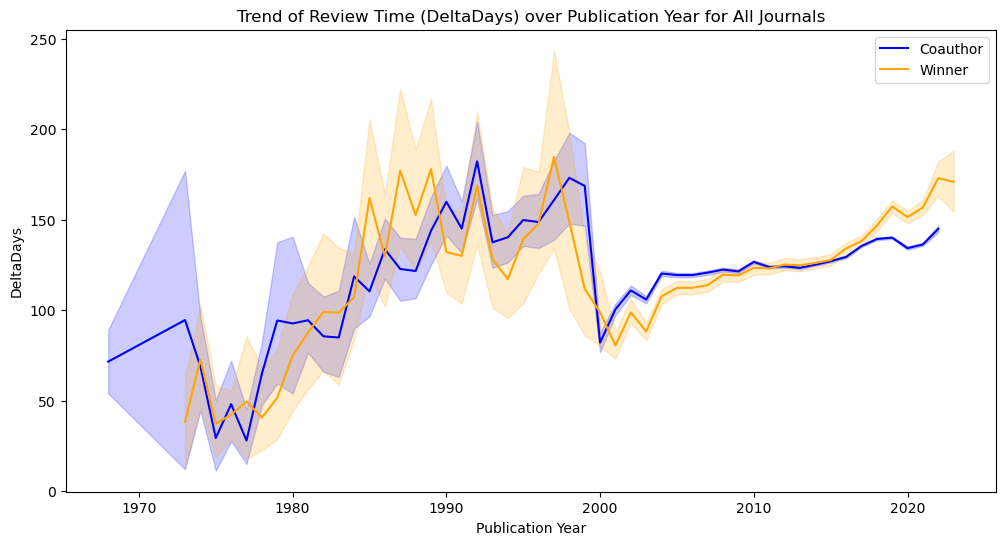

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.lineplot(x='PubYear', y='DeltaDays', data=df[df['if_winner'] == 0], label='Coauthor', color='blue')
sns.lineplot(x='PubYear', y='DeltaDays', data=df[df['if_winner'] == 1], label='Winner', color='orange')
plt.xlabel('Publication Year')
plt.ylabel('DeltaDays')
plt.title('Trend of Review Time (DeltaDays) over Publication Year for All Journals')
plt.legend()
plt.show()

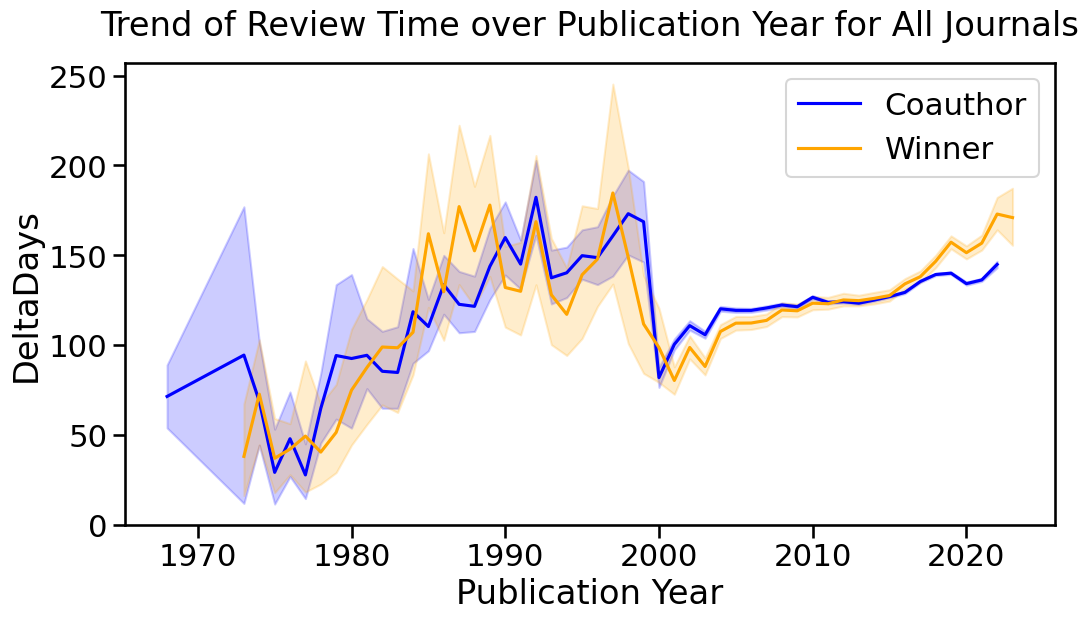

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("talk", font_scale=1.35)
plt.figure(figsize=(12, 6))

sns.lineplot(x='PubYear', y='DeltaDays',
             data=df[df['if_winner'] == 0],
             label='Coauthor', color='blue')
sns.lineplot(x='PubYear', y='DeltaDays',
             data=df[df['if_winner'] == 1],
             label='Winner', color='orange')

plt.xlabel('Publication Year')
plt.ylabel('DeltaDays')
# 增加 pad 参数，比如 pad=20 或者更大
plt.title('Trend of Review Time over Publication Year for All Journals', pad=20)

plt.legend()
plt.show()


In [6]:
df1 = df[df['is_nature_index'] == 1]
df1

,group_id,author_id,if_winner,work_id,author_position,doi,pmid,JournalISSN,PubYear,DeltaDays,...,winner_count,cited_by_count,ref_num,first_pub_year,academic_experience,JournalISSN_clean,year_diff,is_nature_index,JIF,JIF5Years
3,1.0,A100328954,1,W2079983821,last,nature10500,21993758.0,1476-4687,2011.0,301.0,...,1,92,26,1968,43.0,14764687,5.0,1.0,50.5,54.4
4,1.0,A100328954,1,W2626909667,middle,s41467-017-00070-0,28623249.0,2041-1723,2017.0,11.0,...,1,43,34,1968,49.0,20411723,1.0,1.0,14.7,16.1
6,1.0,A100328954,1,W2023711487,last,nnano.2009.5,19350035.0,1748-3395,2009.0,156.0,...,1,118,15,1968,41.0,17483395,7.0,1.0,38.1,39.6
7,1.0,A100328954,1,W2146062744,middle,nmat2471,19525950.0,1476-4660,2009.0,78.0,...,1,125,31,1968,41.0,14764660,7.0,1.0,37.2,44.0
8,1.0,A100328954,1,W2082015621,last,nature08274,19727196.0,1476-4687,2009.0,130.0,...,1,703,24,1968,41.0,14764687,7.0,1.0,50.5,54.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1168796,1778.0,A2145135672,0,W2011025973,last,10.1289/ehp.10978,18560523.0,0091-6765,2008.0,112.0,...,0,24,35,1979,29.0,00916765,6.0,1.0,10.1,10.3
1168798,1778.0,A2022257047,0,W2430656774,middle,10.1038/ncomms11831,27291101.0,2041-1723,2016.0,139.0,...,0,208,57,1980,36.0,20411723,14.0,1.0,14.7,16.1
1168799,1778.0,A2022257047,0,W2430656774,middle,10.1038/ncomms11831,27291101.0,2041-1723,2016.0,139.0,...,0,208,57,1980,36.0,20411723,14.0,1.0,14.7,16.1
1168801,1778.0,A2175935238,0,W2774887741,last,10.1038/nature24488,29239352.0,1476-4687,2017.0,184.0,...,0,48,122,1970,47.0,14764687,15.0,1.0,50.5,54.4


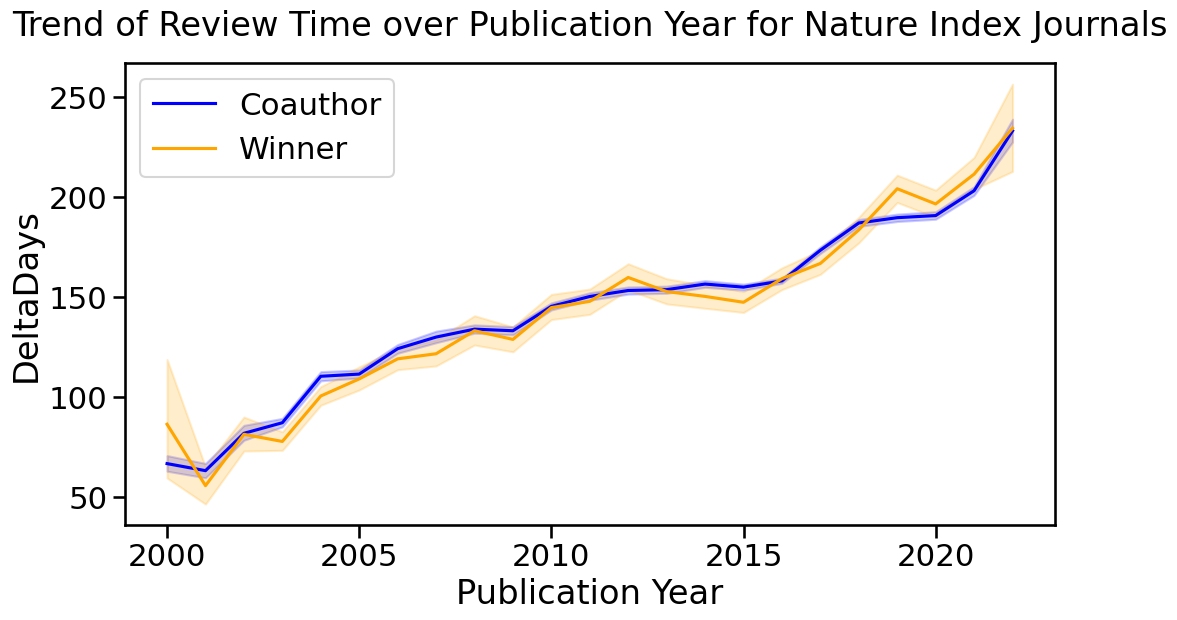

In [7]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='PubYear', y='DeltaDays', data=df1[(df1['if_winner'] == 0) & (df1['PubYear'] >= 2000)], label='Coauthor', color='blue')
sns.lineplot(x='PubYear', y='DeltaDays', data=df1[(df1['if_winner'] == 1) & (df1['PubYear'] >= 2000)], label='Winner', color='orange')
plt.xlabel('Publication Year')
plt.ylabel('DeltaDays')
plt.title('Trend of Review Time over Publication Year for Nature Index Journals', pad =20)
plt.legend()
plt.show()

In [8]:
df1 = df[df['is_nature_index'] == 0]
df1

,group_id,author_id,if_winner,work_id,author_position,doi,pmid,JournalISSN,PubYear,DeltaDays,...,winner_count,cited_by_count,ref_num,first_pub_year,academic_experience,JournalISSN_clean,year_diff,is_nature_index,JIF,JIF5Years
0,1.0,A100328954,1,W2064862591,last,j.bpj.2009.04.054,19619467.0,1542-0086,2009.0,34.0,...,1,15,46,1968,41.0,15420086,7.0,0.0,3.2,3.2
1,1.0,A100328954,1,W1948327735,last,gkv739,26184876.0,1362-4962,2015.0,64.0,...,1,3,19,1968,47.0,13624962,1.0,0.0,16.6,16.1
2,1.0,A100328954,1,W2761930832,last,j.chembiol.2017.08.018,28988948.0,2451-9448,2017.0,95.0,...,1,12,36,1968,49.0,24519448,1.0,0.0,6.6,8.2
5,1.0,A100328954,1,W1567090568,last,28998,9707114.0,2291-9694,2021.0,134.0,...,1,2266,36,1968,53.0,22919694,5.0,0.0,3.1,3.5
9,1.0,A100328954,1,W1656731888,last,16437,9923675.0,1438-8871,2020.0,248.0,...,1,666,26,1968,52.0,14388871,4.0,0.0,5.8,6.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1168802,1778.0,A2550302871,0,W2810788743,middle,10.1038/s41598-018-28503-w,29976935.0,2045-2322,2018.0,122.0,...,0,12,52,2001,17.0,20452322,16.0,0.0,3.8,4.3
1168803,1778.0,A1979552405,0,W2131927690,last,10.1017/s1431927606060491,16984669.0,1431-9276,2006.0,447.0,...,0,19,17,1992,14.0,14319276,4.0,0.0,2.9,3.4
1168805,1778.0,A2185106891,0,W2300775557,middle,10.1016/j.scitotenv.2016.03.079,26994806.0,1879-1026,2016.0,46.0,...,0,22,54,2000,16.0,18791026,14.0,0.0,8.2,8.6
1168806,1778.0,A2155499886,0,W2409721926,middle,10.1038/srep20159,26832223.0,2045-2322,2016.0,73.0,...,0,136,53,1971,45.0,20452322,14.0,0.0,3.8,4.3


In [9]:
df2 = df1[df1['PubYear'] == 2023]
df2

,group_id,author_id,if_winner,work_id,author_position,doi,pmid,JournalISSN,PubYear,DeltaDays,...,winner_count,cited_by_count,ref_num,first_pub_year,academic_experience,JournalISSN_clean,year_diff,is_nature_index,JIF,JIF5Years
3145,18.0,A1133887922,1,W1617092022,last,46925,10573413.0,2368-7959,2023.0,131.0,...,1,72,11,1973,50.0,23687959,10.0,0.0,4.8,5.1
34798,50.0,A130489364,1,W1671013354,last,41222,9242398.0,2561-326x,2023.0,187.0,...,2,10,0,1980,43.0,2561326X,18.0,0.0,2.0,NaN
34827,50.0,A130489364,1,W1571689838,middle,40645,9217159.0,2561-326x,2023.0,183.0,...,2,468,31,1980,43.0,2561326X,18.0,0.0,2.0,NaN
34840,50.0,A130489364,1,W1483422351,middle,41574,9252190.0,1929-073x,2023.0,250.0,...,3,323,30,1980,43.0,1929073X,18.0,0.0,1.9,2.2
37000,59.0,A1354385636,1,W1664439142,middle,46528,10586878.0,2292-9495,2023.0,127.0,...,2,723,25,1975,48.0,22929495,7.0,0.0,2.6,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1127783,1705.0,A67045253,1,W1612036080,last,43049,9202111.0,2369-2960,2023.0,79.0,...,1,4,2,1975,48.0,23692960,8.0,0.0,3.5,4.7
1134300,1715.0,A679456835,1,W2130603065,last,44188,10524633.0,1438-8871,2023.0,175.0,...,1,841,20,1977,46.0,14388871,30.0,0.0,5.8,6.7
1138675,1732.0,A710126269,1,W1566516389,first,41193,9242391.0,2561-326x,2023.0,172.0,...,1,1,0,1969,54.0,2561326X,41.0,0.0,2.0,NaN
1139478,1738.0,A723667461,1,W1610621306,middle,40582,9217153.0,2561-7605,2023.0,137.0,...,1,71,7,1971,52.0,25617605,6.0,0.0,5.0,NaN


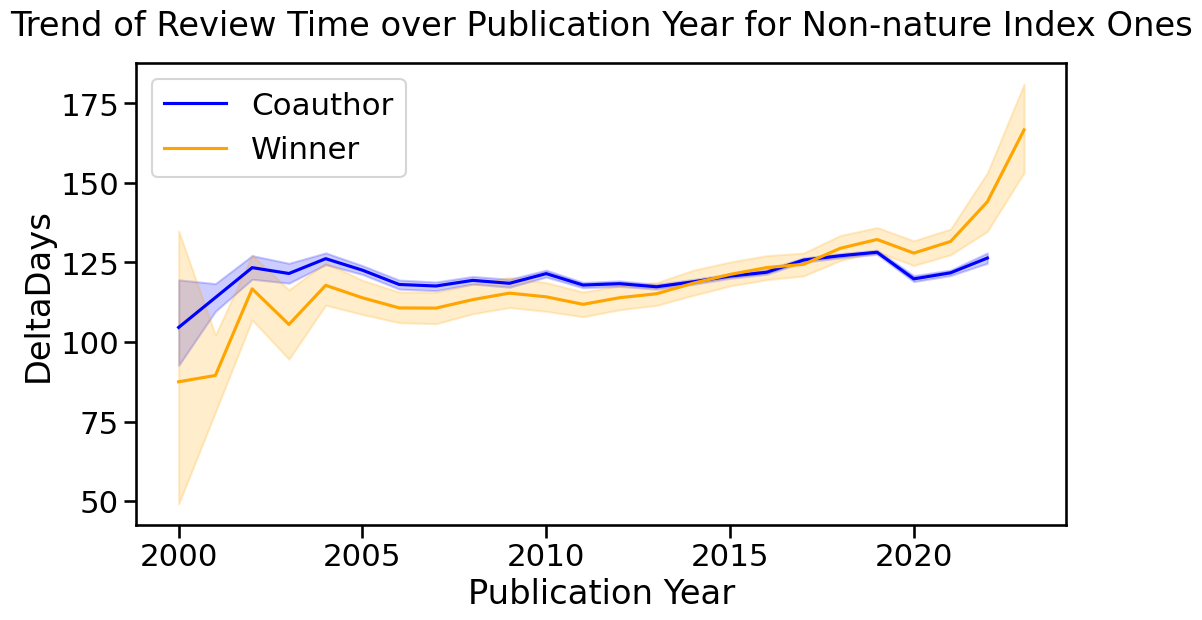

In [10]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='PubYear', y='DeltaDays', data=df1[(df1['if_winner'] == 0) & (df1['PubYear'] >= 2000)], label='Coauthor', color='blue')
sns.lineplot(x='PubYear', y='DeltaDays', data=df1[(df1['if_winner'] == 1) & (df1['PubYear'] >= 2000)], label='Winner', color='orange')
plt.xlabel('Publication Year')
plt.ylabel('DeltaDays')
plt.title('Trend of Review Time over Publication Year for Non-nature Index Ones', pad =20)
plt.legend()
plt.show()

In [11]:
target_issns1 = {'0028-0836', '1476-4687',  # Nature
                '0036-8075', '1095-9203',  # Science
                '0027-8424', '1091-6490'}  # PNAS

df_target1 = df[df['JournalISSN'].isin(target_issns1)].copy()

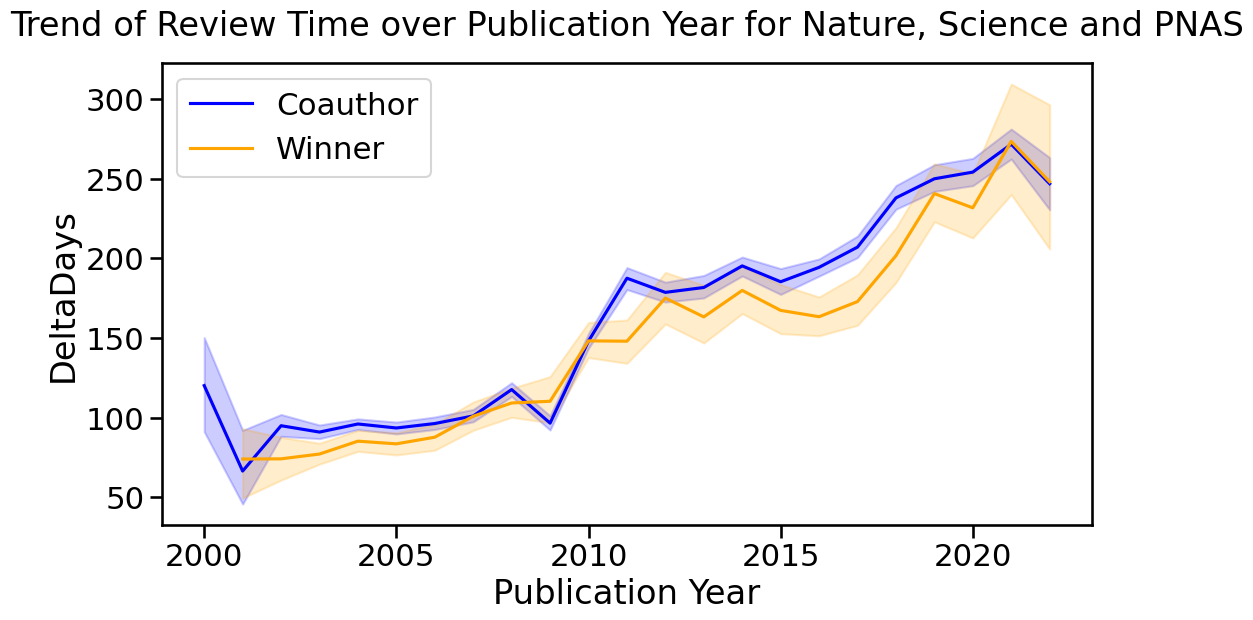

In [12]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='PubYear', y='DeltaDays', data=df_target1[(df_target1['if_winner'] == 0) & (df_target1['PubYear'] >= 2000)], label='Coauthor', color='blue')
sns.lineplot(x='PubYear', y='DeltaDays', data=df_target1[(df_target1['if_winner'] == 1) & (df_target1['PubYear'] >= 2000)], label='Winner', color='orange')
plt.xlabel('Publication Year')
plt.ylabel('DeltaDays')
plt.title('Trend of Review Time over Publication Year for Nature, Science and PNAS', pad =20)
plt.legend()
plt.show()

In [13]:
target_issns2 = {
    # Lancet
    '0028-0836', '1476-4687',  # 印刷版和电子版ISSN
    # JAMA
    '0098-7484', '1538-3598',  
    # NEJM
    '0028-4793', '1533-4406',  
    # BMJ
    '0959-8138', '1756-1833'    
}

df_target2 = df[df['JournalISSN'].isin(target_issns2)].copy()
df_target2

,group_id,author_id,if_winner,work_id,author_position,doi,pmid,JournalISSN,PubYear,DeltaDays,...,winner_count,cited_by_count,ref_num,first_pub_year,academic_experience,JournalISSN_clean,year_diff,is_nature_index,JIF,JIF5Years
3,1.0,A100328954,1,W2079983821,last,nature10500,21993758.0,1476-4687,2011.0,301.0,...,1,92,26,1968,43.0,14764687,5.0,1.0,50.5,54.4
8,1.0,A100328954,1,W2082015621,last,nature08274,19727196.0,1476-4687,2009.0,130.0,...,1,703,24,1968,41.0,14764687,7.0,1.0,50.5,54.4
22,1.0,A100328954,1,W2032813700,last,nature09026,20463734.0,1476-4687,2010.0,105.0,...,1,607,22,1968,42.0,14764687,6.0,1.0,50.5,54.4
103,1.0,A2443672252,0,W2007855820,middle,10.1038/nature12009,23535594.0,1476-4687,2013.0,138.0,...,0,276,40,1970,43.0,14764687,3.0,1.0,50.5,54.4
150,1.0,A2443672252,0,W3011517822,middle,10.1038/s41586-020-2098-y,32188941.0,1476-4687,2020.0,294.0,...,0,154,61,1970,50.0,14764687,4.0,1.0,50.5,54.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1168717,1778.0,A2159042405,0,W3036730421,middle,10.1038/s41586-020-2361-2,32555490.0,1476-4687,2020.0,220.0,...,0,47,34,1987,33.0,14764687,18.0,1.0,50.5,54.4
1168724,1778.0,A2100063418,0,W2887941197,middle,10.1038/s41586-018-0434-2,30127406.0,1476-4687,2018.0,322.0,...,0,49,34,1981,37.0,14764687,16.0,1.0,50.5,54.4
1168740,1778.0,A2076615123,0,W2143811190,middle,10.1038/nature05759,17507980.0,1476-4687,2007.0,269.0,...,0,109,30,1935,72.0,14764687,5.0,1.0,50.5,54.4
1168795,1778.0,A2022257047,0,W1971356330,middle,10.1038/nature01265,12466838.0,0028-0836,2002.0,155.0,...,0,119,14,1980,22.0,00280836,0.0,1.0,50.5,54.4


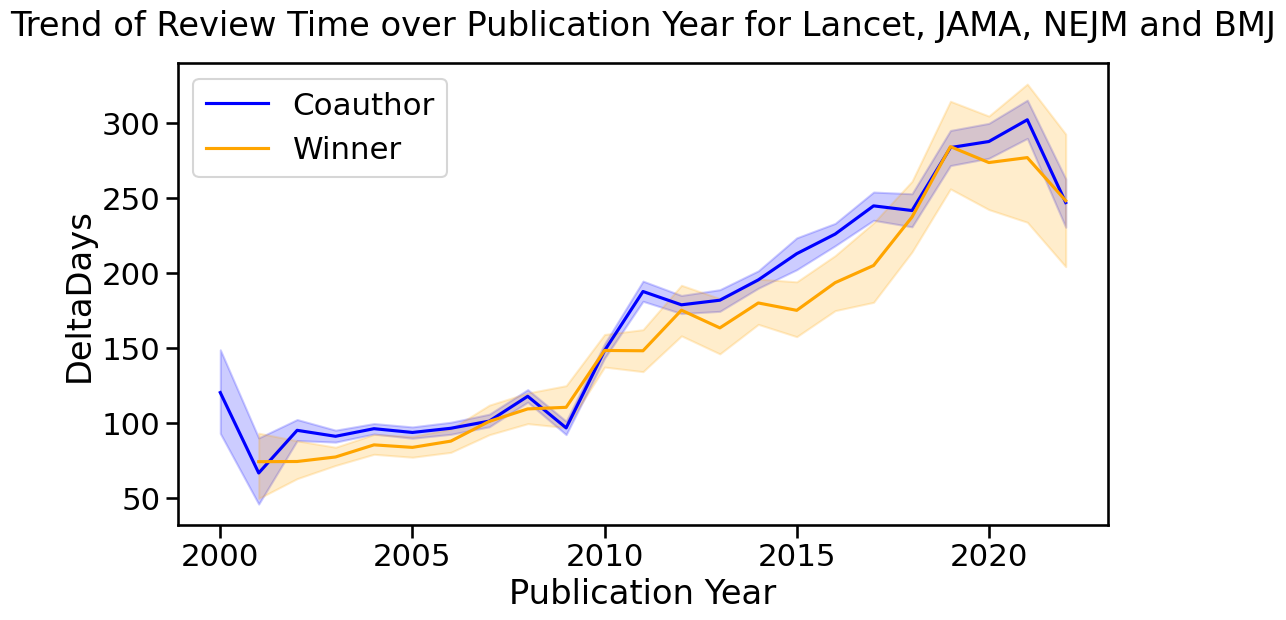

In [14]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='PubYear', y='DeltaDays', data=df_target2[(df_target2['if_winner'] == 0) & (df_target2['PubYear'] >= 2000)], label='Coauthor', color='blue')
sns.lineplot(x='PubYear', y='DeltaDays', data=df_target2[(df_target2['if_winner'] == 1) & (df_target2['PubYear'] >= 2000)], label='Winner', color='orange')
plt.xlabel('Publication Year')
plt.ylabel('DeltaDays')
plt.title('Trend of Review Time over Publication Year for Lancet, JAMA, NEJM and BMJ', pad =20)
plt.legend()
plt.show()

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
from matplotlib.lines import Line2D
warnings.filterwarnings('ignore')
# 禁用LaTeX渲染以避免Unicode错误
plt.rcParams['text.usetex'] = False

warnings.filterwarnings('ignore')

df = pd.read_csv('final_group_pos_doipmid_puby_deltadays_field_tsize_top5_before0_after1_coauthor_wc0_natindex_fpy_aca_exp_jif_EISSN.csv')

df = df[(df['DeltaDays'] > 0) & (df['DeltaDays'] <= 20000)].copy()
df['year_diff'] = abs(df['PubYear'] - df['awardYear'])



df['is_nature_index'] = df['is_nature_index'].fillna(2).astype('category')
df['JournalISSN'] = df['JournalISSN'].fillna("Unknown")
df['author_position'] = pd.Categorical(df['author_position'], categories=["first", "middle", "last"])
df['field'] = df['field'].astype('category')
df['is_top5'] = df['is_top5'].astype('category')

def preprocess_data(data):
    data = data.copy()
    categorical_cols = ['author_position', 'is_top5', 'before_or_after', 'field']
    for col in categorical_cols:
        if col in data.columns:
            data[col] = data[col].astype('category')
    
    quantile_ranges = {'cited_by_count': 0.995, 'ref_num': 0.99,'JIF': 0.99, 'JIF5Years': 0.99}
    # quantile_ranges = { }
    for col, q in quantile_ranges.items():
        if col in data.columns:
            data = data[data[col] < data[col].quantile(q)]
    return data

df = preprocess_data(df)

df_nature = preprocess_data(df[df['is_nature_index'] == 1].copy())
df_nature

,group_id,author_id,if_winner,work_id,author_position,doi,pmid,JournalISSN,PubYear,DeltaDays,...,winner_count,cited_by_count,ref_num,first_pub_year,academic_experience,JournalISSN_clean,year_diff,is_nature_index,JIF,JIF5Years
4,1.0,A100328954,1,W2626909667,middle,s41467-017-00070-0,28623249.0,2041-1723,2017.0,11.0,...,1,43,34,1968,49.0,20411723,1.0,1.0,14.7,16.1
6,1.0,A100328954,1,W2023711487,last,nnano.2009.5,19350035.0,1748-3395,2009.0,156.0,...,1,118,15,1968,41.0,17483395,7.0,1.0,38.1,39.6
12,1.0,A100328954,1,W2602323869,last,nchem.2745,28754940.0,1755-4349,2017.0,336.0,...,1,39,21,1968,49.0,17554349,1.0,1.0,19.2,22.0
14,1.0,A100328954,1,W2989653485,middle,s41557-019-0369-8,31767992.0,1755-4349,2019.0,197.0,...,1,72,48,1968,51.0,17554349,3.0,1.0,19.2,22.0
17,1.0,A100328954,1,W2094737302,last,nnano.2014.102,24880222.0,1748-3395,2014.0,217.0,...,1,64,27,1968,46.0,17483395,2.0,1.0,38.1,39.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1168779,1778.0,A2112245878,0,W2802154306,last,10.1038/s41467-018-03564-7,29662220.0,2041-1723,2018.0,76.0,...,0,44,38,1993,25.0,20411723,16.0,1.0,14.7,16.1
1168793,1778.0,A2076615123,0,W3108308052,last,10.1126/sciadv.abd1387,33239296.0,2375-2548,2020.0,126.0,...,0,19,100,1935,85.0,23752548,18.0,1.0,11.7,13.7
1168796,1778.0,A2145135672,0,W2011025973,last,10.1289/ehp.10978,18560523.0,0091-6765,2008.0,112.0,...,0,24,35,1979,29.0,00916765,6.0,1.0,10.1,10.3
1168798,1778.0,A2022257047,0,W2430656774,middle,10.1038/ncomms11831,27291101.0,2041-1723,2016.0,139.0,...,0,208,57,1980,36.0,20411723,14.0,1.0,14.7,16.1


In [16]:
df_nonnature = preprocess_data(df[df['is_nature_index'] == 0].copy())

df_nonnature

,group_id,author_id,if_winner,work_id,author_position,doi,pmid,JournalISSN,PubYear,DeltaDays,...,winner_count,cited_by_count,ref_num,first_pub_year,academic_experience,JournalISSN_clean,year_diff,is_nature_index,JIF,JIF5Years
0,1.0,A100328954,1,W2064862591,last,j.bpj.2009.04.054,19619467.0,1542-0086,2009.0,34.0,...,1,15,46,1968,41.0,15420086,7.0,0.0,3.2,3.2
1,1.0,A100328954,1,W1948327735,last,gkv739,26184876.0,1362-4962,2015.0,64.0,...,1,3,19,1968,47.0,13624962,1.0,0.0,16.6,16.1
2,1.0,A100328954,1,W2761930832,last,j.chembiol.2017.08.018,28988948.0,2451-9448,2017.0,95.0,...,1,12,36,1968,49.0,24519448,1.0,0.0,6.6,8.2
13,1.0,A100328954,1,W2027489696,last,j.jmgm.2006.03.005,16630733.0,1093-3263,2006.0,79.0,...,1,64,32,1968,38.0,10933263,10.0,0.0,2.7,2.4
15,1.0,A100328954,1,W2021237069,last,j.biosystems.2009.07.004,19607875.0,1872-8324,2009.0,119.0,...,1,20,19,1968,41.0,18728324,7.0,0.0,2.0,1.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1168802,1778.0,A2550302871,0,W2810788743,middle,10.1038/s41598-018-28503-w,29976935.0,2045-2322,2018.0,122.0,...,0,12,52,2001,17.0,20452322,16.0,0.0,3.8,4.3
1168803,1778.0,A1979552405,0,W2131927690,last,10.1017/s1431927606060491,16984669.0,1431-9276,2006.0,447.0,...,0,19,17,1992,14.0,14319276,4.0,0.0,2.9,3.4
1168805,1778.0,A2185106891,0,W2300775557,middle,10.1016/j.scitotenv.2016.03.079,26994806.0,1879-1026,2016.0,46.0,...,0,22,54,2000,16.0,18791026,14.0,0.0,8.2,8.6
1168806,1778.0,A2155499886,0,W2409721926,middle,10.1038/srep20159,26832223.0,2045-2322,2016.0,73.0,...,0,136,53,1971,45.0,20452322,14.0,0.0,3.8,4.3


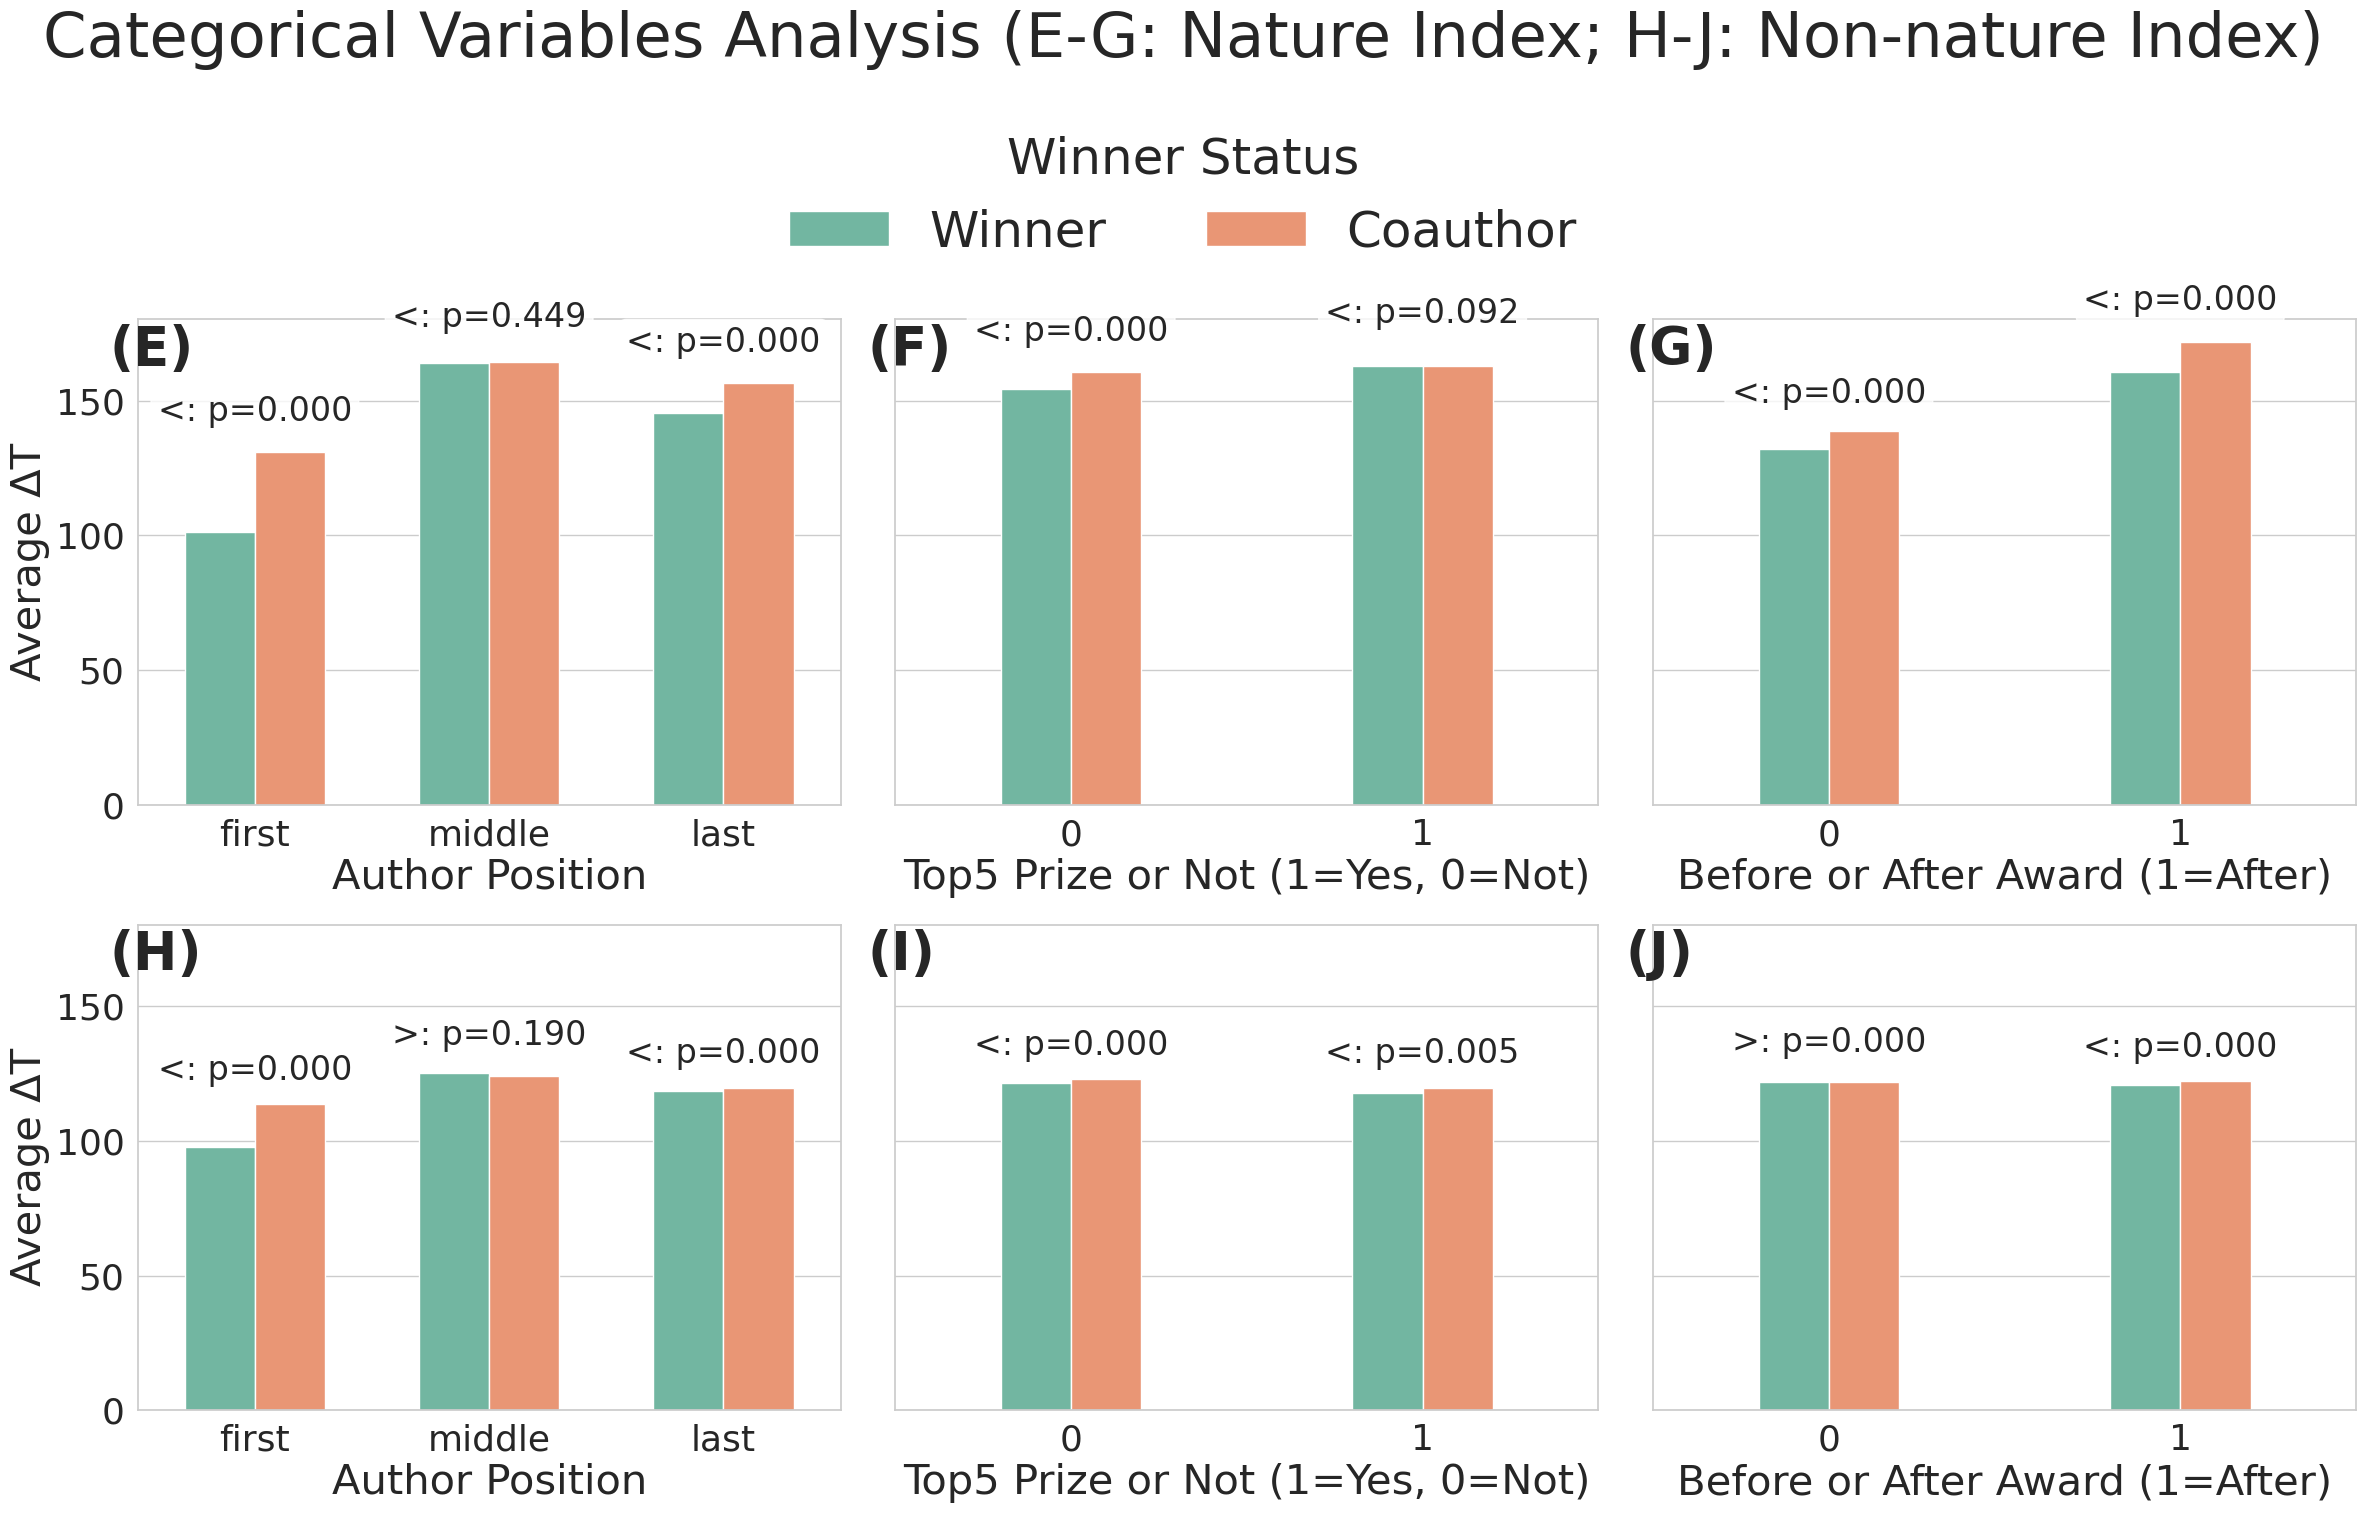

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
from matplotlib.lines import Line2D
warnings.filterwarnings('ignore')
# 禁用LaTeX渲染以避免Unicode错误
plt.rcParams['text.usetex'] = False

warnings.filterwarnings('ignore')

df = pd.read_csv('final_group_pos_doipmid_puby_deltadays_field_tsize_top5_before0_after1_coauthor_wc0_natindex_fpy_aca_exp_jif_EISSN.csv')

df = df[(df['DeltaDays'] > 0) & (df['DeltaDays'] <= 20000)].copy()
df['year_diff'] = abs(df['PubYear'] - df['awardYear'])

df['is_nature_index'] = df['is_nature_index'].fillna(2).astype('category')
df['JournalISSN'] = df['JournalISSN'].fillna("Unknown")
df['author_position'] = pd.Categorical(df['author_position'], categories=["first", "middle", "last"])
df['field'] = df['field'].astype('category')
df['is_top5'] = df['is_top5'].astype('category')

def preprocess_data(data):
    data = data.copy()
    categorical_cols = ['author_position', 'is_top5', 'before_or_after', 'field']
    for col in categorical_cols:
        if col in data.columns:
            data[col] = data[col].astype('category')
    
    quantile_ranges = {'cited_by_count': 0.995, 'ref_num': 0.99,'JIF': 0.99, 'JIF5Years': 0.99}
    # quantile_ranges = { }
    for col, q in quantile_ranges.items():
        if col in data.columns:
            data = data[data[col] < data[col].quantile(q)]
    return data

df = preprocess_data(df)

df_nature = preprocess_data(df[df['is_nature_index'] == 1].copy())
df_nonnature = preprocess_data(df[df['is_nature_index'] == 0].copy())

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

def ci95(x):
    n = x.count()
    if n <= 1:
        return np.nan
    sem = stats.sem(x, nan_policy='omit')
    t_val = stats.t.ppf(1 - 0.025, n - 1)
    return sem * t_val

cat_vars = ['author_position', 'is_top5', 'before_or_after']

# 1) 全局放大 1.5 倍
plt.rcParams.update({
    'font.size': 24,                # 默认文字：16×1.5≈24
    'axes.titlesize': 30,           # 子图小标题，20×1.5≈30
    'axes.labelsize': 27,           # 坐标轴标签，18×1.5≈27
    'xtick.labelsize': 21,          # 刻度标签，14×1.5≈21
    'ytick.labelsize': 21,
    'legend.fontsize': 21,          # 图例内容，14×1.5≈21
    'legend.title_fontsize': 24,    # 图例标题，16×1.5≈24
    'figure.titlesize': 36          # 大标题，24×1.5≈36
})

sns.set_theme(style="whitegrid", font_scale=1.5)

# 2) 新建画布
fig, axes = plt.subplots(2, 3, figsize=(24, 16), sharey=True)
fig.suptitle(
    "Categorical Variables Analysis (E-G: Nature Index; H-J: Non-nature Index)",
    fontsize=45, y=0.95
)

palette = sns.color_palette("Set2", 2)
letters = ['E','F','G','H','I','J']

# 创建变量标签映射
var_labels = {
    'author_position': 'Author Position',
    'is_top5': 'Top5 Prize or Not (1=Yes, 0=Not)',
    'before_or_after': 'Before or After Award (1=After)'
}

def draw_panel(data, var, ax, letter):
    # 计算均值和 CI
    grouped = (
        data.groupby([var, 'if_winner'])['DeltaDays']
            .agg(mean='mean', ci=lambda x: ci95(x))
            .reset_index()
    )
    
    # 获取类别数量
    n_categories = len(data[var].cat.categories)
    
    # 根据类别数量调整柱子宽度
    if n_categories == 3:  # author_position
        width = 0.6
    else:  # is_top5 和 before_or_after
        width = 0.4
    
    # 绘制柱状图
    sns.barplot(
        x=var, y='mean', hue='if_winner',
        data=grouped, ax=ax,
        order=data[var].cat.categories,
        hue_order=[1,0],
        palette=palette, ci=None,
        width=width  # 使用调整后的宽度
    )

    # 误差条 & p‑value
    xt = ax.get_xticks()
    for i, cat in enumerate(data[var].cat.categories):
        row1 = grouped[(grouped[var]==cat)&(grouped['if_winner']==1)]
        row0 = grouped[(grouped[var]==cat)&(grouped['if_winner']==0)]
        m1, ci1 = row1['mean'].iloc[0], row1['ci'].iloc[0]
        m0, ci0 = row0['mean'].iloc[0], row0['ci'].iloc[0]
        
        # 计算p值
        p = stats.ttest_ind(
            np.log(data[(data[var]==cat)&(data['if_winner']==1)]['DeltaDays']),
            np.log(data[(data[var]==cat)&(data['if_winner']==0)]['DeltaDays']),
            alternative='less'
        ).pvalue
        
        # 确定比较符号
        if m1 < m0:
            symbol = '<'
        else:
            symbol = '>'
            
        p_str = f"p={p:.3f}"
            
        y_max = max(m1+ci1, m0+ci0)
        ax.text(
            xt[i], y_max * 1.05,
            f"{symbol}: {p_str}",
            ha='center', va='bottom',
            fontsize=24,  # 稍微减小字体大小以容纳更多内容
            bbox=dict(boxstyle="round,pad=0.2", fc="white", alpha=0.8)
        )

    # 左上角小标题 (E) 等 - 向左上角移动
    ax.text(
        -0.04, 0.99, f'({letter})',  # 调整位置
        transform=ax.transAxes,
        fontsize=38,
        fontweight='bold', va='top'
    )

    # 坐标轴标签
    ax.set_xlabel(var_labels[var], fontsize=30)
    ax.set_ylabel('Average ΔT', fontsize=30)

    # 放大分类刻度标签
    ax.tick_params(axis='x', labelsize=26)  # first/middle/last 或 0/1
    ax.tick_params(axis='y', labelsize=26)

    # 去掉子图自己的 legend
    ax.get_legend().remove()


# 3) 绘制所有子图
for i, var in enumerate(cat_vars):
    draw_panel(df_nature, var, axes[0, i], letters[i])
for i, var in enumerate(cat_vars):
    draw_panel(df_nonnature, var, axes[1, i], letters[3 + i])

# 4) 在大标题下方加一个统一 legend（放大字号）
handles, _ = axes[0,0].get_legend_handles_labels()
fig.legend(
    handles, ['Winner', 'Coauthor'],
    title='Winner Status',
    loc='upper center',
    ncol=2,
    bbox_to_anchor=(0.5, 0.90),
    frameon=False,
    fontsize=36,         # 图例条目字号
    title_fontsize=36    # 图例标题字号
)

# 5) 调整布局，让大标题、全局 legend 和子图都有空隙
plt.tight_layout(rect=[0, 0, 1, 0.85])

# 保存 & 显示
plt.savefig("combined_categorical_bigfont_legend_top_v13.png", dpi=1000, bbox_inches='tight')
plt.show()

## Tables

In [18]:
import pandas as pd
import numpy as np

# 1. 读入并预处理
combined_data = pd.read_csv(
    'final_group_pos_doipmid_puby_deltadays_field_tsize_top5_before0_after1_coauthor_wc0_natindex_fpy_aca_exp_jif_EISSN.csv',
    low_memory=False
)
mask = (combined_data['DeltaDays'] > 0) & (combined_data['DeltaDays'] <= 10000)
combined_data = combined_data[mask].copy()

combined_data['log_DeltaDays'] = np.log1p(combined_data['DeltaDays'])
combined_data['year_diff'] = abs(combined_data['PubYear'] - combined_data['awardYear']) # fixed
combined_data['academic_experience'] = combined_data['PubYear'] - combined_data['first_pub_year']

# 2. 映射分类变量
author_position_mapping = {'last': 0, 'middle': 1, 'first': 2}
combined_data['author_position_encoded'] = combined_data['author_position'].map(author_position_mapping)

field_mapping = {
    'Art': 0, 'Biology': 1, 'Business': 2, 'Chemistry': 3,
    'Computer science': 4, 'Economics': 5, 'Environmental science': 6,
    'Geography': 7, 'Geology': 8, 'History': 9, 'Materials science': 10,
    'Mathematics': 11, 'Medicine': 12, 'Philosophy': 13, 'Physics': 14,
    'Political science': 15, 'Psychology': 16, 'Sociology': 17
}
combined_data['field_encoded'] = combined_data['field'].map(field_mapping)

# 3. 分箱配置
grouping_config = {
    'teamsize':      {'bins': [1, 3, 6, np.inf],    'labels': ['Small [1-3)', 'Medium [3-6)', 'Large [6+)']},
    'JIF':           {'bins': [0, 10, 50, np.inf],  'labels': ['Low [0-10)', 'Med [10-50)', 'High [50+)']},
    'PubYear':       {'bins': [-np.inf, 2000, 2015, np.inf], 'labels': ['<2000', '2000-2015', '2015+']},
    'ref_num':       {'bins': [0,25,100, np.inf],   'labels': ['Few', 'Moderate', 'Many']},
    'cited_by_count':{'bins': [0,10,100,1000,np.inf],'labels': ['Low','Mod','High','Very High']},
    'year_diff':     {'bins': [0,3,np.inf],         'labels': ['Close','Far']},
    'academic_experience':{'bins': [-1,15,30,np.inf],'labels':['Junior','Mid','Senior']},
    # 以下四个直接分类
    'field':           {'is_categorical': True},
    'author_position': {'is_categorical': True},
    'is_nature_index': {'is_categorical': True},
    'is_top5':         {'is_categorical': True},    
    'before_or_after':         {'is_categorical': True},

    
}

# 4. 统计函数（不变）
def get_stats(data, group_col):
    stats = []
    for grp, sub in data.groupby(group_col, observed=True):
        w = sub.loc[sub['if_winner']==1, 'DeltaDays']
        c = sub.loc[sub['if_winner']==0, 'DeltaDays']
        def agg(x):
            return {
                'min': x.min(), '25%': x.quantile(0.25),
                'mean': x.mean(), 'median': x.median(),
                '75%': x.quantile(0.75), 'max': x.max()
            }
        stats.append({
            'Variable': group_col,
            'Group': grp,
            **{f'winner_{k}': v for k,v in agg(w).items()},
            **{f'coauthor_{k}': v for k,v in agg(c).items()}
        })
    return pd.DataFrame(stats)

# 5. 循环分组并合并
all_stats = []
for var, cfg in grouping_config.items():
    if cfg.get('is_categorical'):
        stats_df = get_stats(combined_data, var)
        stats_df['Variable'] = var.title().replace('_',' ')
    else:
        grp = pd.cut(combined_data[var], bins=cfg['bins'], labels=cfg['labels'], right=False)
        tmp = combined_data.assign(**{f'{var}_grp': grp})
        stats_df = get_stats(tmp, f'{var}_grp')
        stats_df['Variable'] = var.title().replace('_',' ')
    all_stats.append(stats_df)

full_stats = pd.concat(all_stats, ignore_index=True)

# 6. 最终格式化显示
cols = ['Variable','Group'] + \
       [f'winner_{m}' for m in ['min','25%','mean','median','75%','max']] + \
       [f'coauthor_{m}' for m in ['min','25%','mean','median','75%','max']]
full_stats = full_stats[cols]
pd.set_option('display.float_format','{:.2f}'.format)
#display(full_stats)


In [19]:
# 6. 调整列顺序并格式化显示
metrics = ['min', '25%', 'mean', 'median', '75%', 'max']
cols = ['Variable', 'Group'] 
for m in metrics:
    cols.extend([f'winner_{m}', f'coauthor_{m}'])  # 成对添加

full_stats = full_stats[cols]  # 按新顺序选择列
pd.set_option('display.float_format','{:.2f}'.format)
full_stats

,Variable,Group,winner_min,coauthor_min,winner_25%,coauthor_25%,winner_mean,coauthor_mean,winner_median,coauthor_median,winner_75%,coauthor_75%,winner_max,coauthor_max
0,Teamsize,Small [1-3),1.00,1.00,41.00,41.00,101.19,98.69,76.00,76.00,130.00,130.00,1611.00,1691.00
1,Teamsize,Medium [3-6),1.00,1.00,58.00,59.00,122.37,120.83,98.00,100.00,157.00,157.00,1238.00,3756.00
2,Teamsize,Large [6+),1.00,1.00,71.00,70.00,141.33,134.08,118.00,113.00,181.00,172.00,2214.00,4151.00
3,Jif,Low [0-10),1.00,1.00,59.00,63.00,121.72,122.36,99.00,104.00,157.00,158.00,2214.00,3987.00
4,Jif,Med [10-50),1.00,1.00,82.00,84.00,158.22,159.50,134.00,137.00,203.00,206.00,1530.00,2696.00
5,Jif,High [50+),1.00,1.00,73.00,80.00,159.42,172.77,121.00,135.00,205.75,226.00,2002.00,1377.00
6,Pubyear,<2000,1.00,1.00,56.00,61.00,132.53,139.62,104.00,113.00,179.00,188.00,663.00,939.00
7,Pubyear,2000-2015,1.00,1.00,58.00,64.00,118.76,122.70,98.00,104.00,154.00,158.00,1530.00,4151.00
8,Pubyear,2015+,1.00,1.00,70.00,68.00,145.20,134.58,119.00,113.00,188.00,174.00,2214.00,3843.00
9,Ref Num,Few,1.00,1.00,40.00,52.00,101.21,109.55,80.00,91.00,136.00,144.00,1846.00,4151.00


In [20]:
metrics = ['min', '25%', 'mean', 'median', '75%', 'max']

# 为每个指标创建元组列
for metric in metrics:
    full_stats[metric] = full_stats[[f'winner_{metric}', f'coauthor_{metric}']].apply(tuple, axis=1)


full_stats = full_stats.drop(columns=[f'winner_{m}' for m in metrics] + [f'coauthor_{m}' for m in metrics])
full_stats = full_stats[['Variable', 'Group'] + metrics]

# 格式化元组显示为两位小数
def format_tuple(t):
    return (f"{t[0]:.2f}", f"{t[1]:.2f}")

for metric in metrics:
    full_stats[metric] = full_stats[metric].apply(format_tuple)

pd.set_option('display.max_columns', None)

In [21]:
def format_tuple(t):
    return (f"{float(t[0]):.2f}", f"{float(t[1]):.2f}")

final_df = full_stats.copy()

column_rename = {
    'min': 'Review Time in Days (Winner, Coauthor) - Min',
    '25%': 'Review Time in Days (Winner, Coauthor) - 25th%',
    'mean': 'Review Time in Days (Winner, Coauthor) - Mean',
    'median': 'Review Time in Days (Winner, Coauthor) - Median',
    '75%': 'Review Time in Days (Winner, Coauthor) - 75th%',
    'max': 'Review Time in Days (Winner, Coauthor) - Max'
}
final_df = final_df.rename(columns=column_rename)

for col in column_rename.values():
    final_df[col] = final_df[col].apply(format_tuple)

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.colheader_justify', 'center')


In [22]:
display(final_df)

,Variable,Group,"Review Time in Days (Winner, Coauthor) - Min","Review Time in Days (Winner, Coauthor) - 25th%","Review Time in Days (Winner, Coauthor) - Mean","Review Time in Days (Winner, Coauthor) - Median","Review Time in Days (Winner, Coauthor) - 75th%","Review Time in Days (Winner, Coauthor) - Max"
0,Teamsize,Small [1-3),"(1.00, 1.00)","(41.00, 41.00)","(101.19, 98.69)","(76.00, 76.00)","(130.00, 130.00)","(1611.00, 1691.00)"
1,Teamsize,Medium [3-6),"(1.00, 1.00)","(58.00, 59.00)","(122.37, 120.83)","(98.00, 100.00)","(157.00, 157.00)","(1238.00, 3756.00)"
2,Teamsize,Large [6+),"(1.00, 1.00)","(71.00, 70.00)","(141.33, 134.08)","(118.00, 113.00)","(181.00, 172.00)","(2214.00, 4151.00)"
3,Jif,Low [0-10),"(1.00, 1.00)","(59.00, 63.00)","(121.72, 122.36)","(99.00, 104.00)","(157.00, 158.00)","(2214.00, 3987.00)"
4,Jif,Med [10-50),"(1.00, 1.00)","(82.00, 84.00)","(158.22, 159.50)","(134.00, 137.00)","(203.00, 206.00)","(1530.00, 2696.00)"
5,Jif,High [50+),"(1.00, 1.00)","(73.00, 80.00)","(159.42, 172.77)","(121.00, 135.00)","(205.75, 226.00)","(2002.00, 1377.00)"
6,Pubyear,<2000,"(1.00, 1.00)","(56.00, 61.00)","(132.53, 139.62)","(104.00, 113.00)","(179.00, 188.00)","(663.00, 939.00)"
7,Pubyear,2000-2015,"(1.00, 1.00)","(58.00, 64.00)","(118.76, 122.70)","(98.00, 104.00)","(154.00, 158.00)","(1530.00, 4151.00)"
8,Pubyear,2015+,"(1.00, 1.00)","(70.00, 68.00)","(145.20, 134.58)","(119.00, 113.00)","(188.00, 174.00)","(2214.00, 3843.00)"
9,Ref Num,Few,"(1.00, 1.00)","(40.00, 52.00)","(101.21, 109.55)","(80.00, 91.00)","(136.00, 144.00)","(1846.00, 4151.00)"


# Fixed Effect Regression Table

In [23]:
import pandas as pd
import numpy as np
import sys
sys.path.append('/home/ls2543/python_packages')
import statsmodels.api as sm
from statsmodels.formula.api import ols
from tqdm import tqdm

df = pd.read_csv('final_group_pos_doipmid_puby_deltadays_field_tsize_top5_before0_after1_coauthor_wc0_natindex_fpy_aca_exp_jif_EISSN.csv')
# df = df[(df['DeltaDays'] > 0) & (df['DeltaDays'] <= 10000)].copy()


df['is_nature_index'] = df['is_nature_index'].fillna(2).astype('category')
df['JournalISSN'] = df['JournalISSN'].fillna("Unknown")
df['author_position'] = pd.Categorical(df['author_position'], categories=["first", "middle", "last"])
df['field'] = df['field'].astype('category')
df['is_top5'] = df['is_top5'].astype('category')
df['year_diff'] = abs(df['PubYear'] - df['awardYear'])

df_nature = df[df['is_nature_index'] == 1].copy()

# 确保正确的分类类型转换
df_nature['is_nature_index'] = df_nature['is_nature_index'].astype('category')  # 新增
df_nature['before_or_after'] = df_nature['before_or_after'].astype('category')  # 新增

# 然后进行类别清理
df_nature['is_nature_index'] = df_nature['is_nature_index'].cat.remove_unused_categories()
df_nature['before_or_after'] = df_nature['before_or_after'].cat.remove_unused_categories()
df_nature

,group_id,author_id,if_winner,work_id,author_position,doi,pmid,JournalISSN,PubYear,DeltaDays,field,teamsize,is_top5,awardYear,before_or_after,winner_count,cited_by_count,ref_num,first_pub_year,academic_experience,JournalISSN_clean,year_diff,is_nature_index,JIF,JIF5Years
3,1.00,A100328954,1,W2079983821,last,nature10500,21993758.00,1476-4687,2011.00,301.00,Chemistry,8.00,0,2016.00,0,1,92,26,1968,43.00,14764687,5.00,1.00,50.50,54.40
4,1.00,A100328954,1,W2626909667,middle,s41467-017-00070-0,28623249.00,2041-1723,2017.00,11.00,Chemistry,8.00,0,2016.00,1,1,43,34,1968,49.00,20411723,1.00,1.00,14.70,16.10
6,1.00,A100328954,1,W2023711487,last,nnano.2009.5,19350035.00,1748-3395,2009.00,156.00,Chemistry,4.00,0,2016.00,0,1,118,15,1968,41.00,17483395,7.00,1.00,38.10,39.60
7,1.00,A100328954,1,W2146062744,middle,nmat2471,19525950.00,1476-4660,2009.00,78.00,Chemistry,7.00,0,2016.00,0,1,125,31,1968,41.00,14764660,7.00,1.00,37.20,44.00
8,1.00,A100328954,1,W2082015621,last,nature08274,19727196.00,1476-4687,2009.00,130.00,Chemistry,9.00,0,2016.00,0,1,703,24,1968,41.00,14764687,7.00,1.00,50.50,54.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1168796,1778.00,A2145135672,0,W2011025973,last,10.1289/ehp.10978,18560523.00,0091-6765,2008.00,112.00,Materials science,7.00,0,2002.00,1,0,24,35,1979,29.00,00916765,6.00,1.00,10.10,10.30
1168798,1778.00,A2022257047,0,W2430656774,middle,10.1038/ncomms11831,27291101.00,2041-1723,2016.00,139.00,Materials science,10.00,0,2002.00,1,0,208,57,1980,36.00,20411723,14.00,1.00,14.70,16.10
1168799,1778.00,A2022257047,0,W2430656774,middle,10.1038/ncomms11831,27291101.00,2041-1723,2016.00,139.00,Materials science,10.00,0,2002.00,1,0,208,57,1980,36.00,20411723,14.00,1.00,14.70,16.10
1168801,1778.00,A2175935238,0,W2774887741,last,10.1038/nature24488,29239352.00,1476-4687,2017.00,184.00,Materials science,7.00,0,2002.00,1,0,48,122,1970,47.00,14764687,15.00,1.00,50.50,54.40


In [24]:
df_nature['year_diff'].describe()

count   246552.00
mean         6.82
std          6.29
min          0.00
25%          2.00
50%          5.00
75%          9.00
max         86.00
Name: year_diff, dtype: float64

In [25]:
base_var = 'DeltaDays ~ C(if_winner) * C(before_or_after)+ C(is_top5)'

model_specs_nature = [
    {'formula': base_var},
    {'formula': base_var + '+ year_diff'},
    {'formula': base_var + '+ teamsize'},
    {'formula': base_var + '+ teamsize + year_diff'},
    {'formula': base_var + '+ JIF'},
    {'formula': base_var + '+ JIF + ref_num'},
    {'formula': base_var + '+ academic_experience'},
    {'formula': base_var + '+ cited_by_count'},
    {'formula': base_var + '+ JIF + teamsize + year_diff + academic_experience + ref_num'},
    {'formula': base_var + '+ JIF + teamsize + year_diff + academic_experience + ref_num + cited_by_count'},
    {'formula': base_var + '+ JIF + teamsize + year_diff + academic_experience + ref_num + cited_by_count + C(author_position)'},
    {'formula': base_var + '+ JIF + teamsize + year_diff + academic_experience + ref_num + cited_by_count + C(field)'},
    {'formula': base_var + '+ JIF + teamsize + year_diff + academic_experience + ref_num + cited_by_count + C(JournalISSN)'},
    {'formula': base_var + '+ JIF + teamsize + year_diff + academic_experience + ref_num + cited_by_count + C(author_position) + C(field)'},
    {'formula': base_var + '+ JIF + teamsize + year_diff + academic_experience + ref_num + cited_by_count + C(author_position) + C(field) + C(JournalISSN)'}
]


In [26]:
def fit_nature_model(spec):
    try:
        model = ols(
            formula=spec['formula'],
            data=df_nature
        ).fit(
            cov_type='cluster',
            cov_kwds={'groups': df_nature['group_id']},
            method='pinv'
        )
        return model
    except Exception as e:
        print(f"Model failed: {spec['formula']}\nError: {str(e)}")
        return None

# Run all models
print("Fitting Nature subsample models...")
nature_models = []
for spec in tqdm(model_specs_nature):
    nature_models.append(fit_nature_model(spec))

# Results table configuration
covariates_nature = [
    'Intercept',
    'C(if_winner)[T.1]',
    'C(before_or_after)[T.1]',
    'C(if_winner)[T.1]:C(before_or_after)[T.1]',
    'C(is_top5)[T.1]',
    'year_diff',
    'teamsize',
    'JIF',
    'ref_num',
    'academic_experience',
    'cited_by_count'
]

cov_display_names_nature = {
    'Intercept': 'Intercept',
    'C(if_winner)[T.1]': 'Winner Status',
    'C(before_or_after)[T.1]': 'After Award',
    'C(if_winner)[T.1]:C(before_or_after)[T.1]': 'Winner × After Award',
    'C(is_top5)[T.1]': 'Top5 Prize',
    'year_diff': 'Year Difference',
    'teamsize': 'Team Size',
    'JIF': 'Journal Impact Factor',
    'ref_num': 'References',
    'academic_experience': 'Experience',
    'cited_by_count': 'Citations'
}

fixed_effects_nature = [
    'Author Position',
    'Journal FE', 
    'Field FE',
    'Group FE',
    'Year FE'
]


Fitting Nature subsample models...


100%|██████████| 15/15 [00:31<00:00,  2.11s/it]


In [27]:
# Generate results table
results = []
for i, model in enumerate(nature_models):
    if not model:
        continue
    
    res = {
        'Model': f'Model {i+1}',
        'N': f"{model.nobs:,.0f}",
        'R²': f"{model.rsquared:.3f}"
    }
    
    # Add coefficients
    for cov in covariates_nature:
        if cov in model.params:
            coef = model.params[cov]
            pval = model.pvalues[cov]
            se = model.bse[cov]
            star = '***' if pval < 0.001 else '**' if pval < 0.01 else '*' if pval < 0.05 else ''
            res[cov_display_names_nature[cov]] = f"{coef:.3f}{star} ({se:.3f})"
        else:
            res[cov_display_names_nature.get(cov, cov)] = ''
    
    # Add fixed effects indicators
    formula = model.model.formula
    res.update({
        'Author Position': 'Yes' if 'C(author_position)' in formula else 'No',
        'Journal FE': 'Yes' if 'C(JournalISSN)' in formula else 'No',
        'Field FE': 'Yes' if 'C(field)' in formula else 'No',
        'Group FE': 'Yes' if 'C(group_id)' in formula else 'No',
        'Year FE': 'Yes' if 'C(PubYear)' in formula else 'No'
    })
    
    results.append(res)


In [28]:
# Create final table
final_table = pd.DataFrame(results).set_index('Model').T
final_table = final_table.reindex(list(cov_display_names_nature.values()) + fixed_effects_nature + ['N', 'R²'])

In [29]:
final_table

Model,Model 1,Model 2,Model 3,Model 4,Model 5,Model 6,Model 7,Model 8,Model 9,Model 10,Model 11,Model 12,Model 13,Model 14,Model 15
Intercept,137.591*** (1.402),138.116*** (1.812),129.577*** (1.772),129.607*** (2.143),127.149*** (1.767),101.883*** (1.954),138.647*** (1.607),141.294*** (1.627),98.575*** (2.359),101.288*** (2.409),76.039*** (2.513),114.358*** (2.793),31.318*** (2.230),88.324*** (2.821),41.348*** (2.378)
Winner Status,-10.945*** (2.459),-10.949*** (2.460),-7.939*** (2.383),-7.941*** (2.384),-12.964*** (2.499),-12.830*** (2.443),-10.591*** (2.521),-8.892*** (2.412),-10.205*** (2.436),-6.570** (2.419),-6.262** (2.389),-7.129** (2.388),-8.948*** (2.316),-6.717** (2.372),-7.824*** (2.288)
After Award,35.957*** (1.442),36.398*** (1.495),36.351*** (1.401),36.374*** (1.448),36.915*** (1.519),33.119*** (1.499),36.370*** (1.432),33.695*** (1.546),33.591*** (1.437),29.711*** (1.462),29.067*** (1.473),29.631*** (1.576),25.999*** (1.515),29.014*** (1.587),26.144*** (1.498)
Winner × After Award,0.490 (3.132),1.147 (3.159),-0.144 (3.033),-0.109 (3.041),0.180 (3.176),-0.186 (3.070),0.601 (3.120),-0.317 (3.100),-0.711 (3.002),-2.459 (2.979),-2.590 (2.951),-2.717 (2.992),-7.248** (2.763),-2.881 (2.969),-8.233** (2.715)
Top5 Prize,8.581*** (2.576),8.430** (2.571),7.487** (2.653),7.479** (2.681),8.689*** (2.546),8.529*** (2.469),8.577*** (2.571),8.289** (2.564),7.749** (2.363),7.150** (2.339),7.125** (2.310),7.684*** (2.297),6.148*** (1.624),7.681*** (2.279),5.949*** (1.545)
Year Difference,,-0.122 (0.154),,-0.006 (0.149),,,,,0.031 (0.141),0.049 (0.133),0.065 (0.131),0.010 (0.129),0.196 (0.107),0.026 (0.128),0.213* (0.102)
Team Size,,,0.378*** (0.035),0.377*** (0.035),,,,,0.280*** (0.036),0.314*** (0.036),0.260*** (0.039),0.359*** (0.031),0.369*** (0.025),0.303*** (0.034),0.285*** (0.021)
Journal Impact Factor,,,,,0.454*** (0.051),0.497*** (0.050),,,0.447*** (0.052),0.599*** (0.057),0.605*** (0.056),0.606*** (0.057),2.055*** (0.071),0.612*** (0.056),2.183*** (0.073)
References,,,,,,0.535*** (0.028),,,0.512*** (0.027),0.521*** (0.027),0.523*** (0.026),0.510*** (0.026),0.325*** (0.022),0.511*** (0.026),0.317*** (0.022)
Experience,,,,,,,-0.051 (0.030),,-0.028 (0.030),-0.049 (0.030),-0.064* (0.030),-0.046 (0.029),0.023 (0.020),-0.059* (0.028),0.013 (0.020)


In [30]:
final_table.to_csv('Table1.csv')

In [31]:
# 筛选目标期刊（包括印刷版和在线ISSN）
target_issns = {'0028-0836', '1476-4687',  # Nature
                '0036-8075', '1095-9203',  # Science
                '0027-8424', '1091-6490'}  # PNAS

df_target = df[df['JournalISSN'].isin(target_issns)].copy()

df_target['before_or_after'] = df_target['before_or_after'].astype('category')
df_target['is_top5'] = df_target['is_top5'].astype('category')
df_target['author_position'] = pd.Categorical(df_target['author_position'], 
                                           categories=["first", "middle", "last"])

df_target = df_target.apply(lambda x: x.cat.remove_unused_categories() 
                          if pd.api.types.is_categorical_dtype(x) else x)


In [32]:
base_var = 'DeltaDays ~ C(if_winner) * C(before_or_after)+ C(is_top5)'


# 更新模型设定（移除JournalISSN FE）
model_specs_target = [
    {'formula': base_var},
    {'formula': base_var + '+ year_diff'},
    {'formula': base_var + '+ teamsize'},
    {'formula': base_var + '+ teamsize + year_diff'},
    {'formula': base_var + '+ JIF'},
    {'formula': base_var + '+ JIF + ref_num'},
    {'formula': base_var + '+ academic_experience'},
    {'formula': base_var + '+ cited_by_count'},
    {'formula': base_var + '+ JIF + teamsize + year_diff + academic_experience + ref_num'},
    {'formula': base_var + '+ JIF + teamsize + year_diff + academic_experience + ref_num + cited_by_count'},
    {'formula': base_var + '+ JIF + teamsize + year_diff + academic_experience + ref_num + cited_by_count + C(author_position)'},
    {'formula': base_var + '+ JIF + teamsize + year_diff + academic_experience + ref_num + cited_by_count + C(field)'},
    {'formula': base_var + '+ JIF + teamsize + year_diff + academic_experience + ref_num + cited_by_count + C(JournalISSN)'},
    {'formula': base_var + '+ JIF + teamsize + year_diff + academic_experience + ref_num + cited_by_count + C(author_position) + C(field)'},
    {'formula': base_var + '+ JIF + teamsize + year_diff + academic_experience + ref_num + cited_by_count + C(author_position) + C(field) + C(PubYear)'},
    {'formula': base_var + '+ JIF + teamsize + year_diff + academic_experience + ref_num + cited_by_count + C(author_position) + C(PubYear) + C(group_id)'}
]

def fit_target_model(spec):
    try:
        model = ols(
            formula=spec['formula'],
            data=df_target
        ).fit(
            cov_type='cluster',
            cov_kwds={'groups': df_target['group_id']},
            method='pinv'
        )
        return model
    except Exception as e:
        print(f"Model failed: {spec['formula']}\nError: {str(e)}")
        return None

# 运行所有模型
print("Fitting Target Journal models...")
target_models = []
for spec in tqdm(model_specs_target):
    target_models.append(fit_target_model(spec))


Fitting Target Journal models...


100%|██████████| 16/16 [00:10<00:00,  1.53it/s]


In [33]:

# Results table configuration
covariates_target = [
    'Intercept',
    'C(if_winner)[T.1]',
    'C(before_or_after)[T.1]',
    'C(if_winner)[T.1]:C(before_or_after)[T.1]',
    'C(is_top5)[T.1]',
    'year_diff',
    'teamsize',
    'JIF',
    'ref_num',
    'academic_experience',
    'cited_by_count'
]

cov_display_names_target = {
    'Intercept': 'Intercept',
    'C(if_winner)[T.1]': 'Winner Status',
    'C(before_or_after)[T.1]': 'After Award',
    'C(if_winner)[T.1]:C(before_or_after)[T.1]': 'Winner × After Award',
    'C(is_top5)[T.1]': 'Top5 Prize',
    'year_diff': 'Year Difference',
    'teamsize': 'Team Size',
    'JIF': 'Journal Impact Factor',
    'ref_num': 'References',
    'academic_experience': 'Experience',
    'cited_by_count': 'Citations'
}

# 固定效应标识
fixed_effects_target = [
    'Author Position',
    'Journal FE', 
    'Field FE',
    'Group FE',
    'Year FE'
]



In [34]:

## 生成结果表格的修正代码
results_target = []
for i, model in enumerate(target_models):
    if not model:
        continue
    
    res = {
        'Model': f'Target Model {i+1}',
        'N': f"{model.nobs:,.0f}",
        'R²': f"{model.rsquared:.3f}"
    }
    
    # 提取系数和标准误（修正参数名匹配）
    for cov in covariates_target:
        # 直接使用cov名称，无需替换下划线
        if cov in model.params:
            coef = model.params[cov]
            pval = model.pvalues.get(cov, 1)
            se = model.bse.get(cov, np.nan)
            star = '***' if pval < 0.001 else '**' if pval < 0.01 else '*' if pval < 0.05 else ''
            res[cov_display_names_target[cov]] = f"{coef:.3f}{star} ({se:.3f})"
        else:
            res[cov_display_names_target.get(cov, cov)] = ''
    
    # 固定效应标识（保持不变）
    formula = model.model.formula
    res.update({
        'Author Position': 'Yes' if 'C(author_position)' in formula else 'No',
        'Journal FE': 'Yes' if 'C(JournalISSN)' in formula else 'No',
        'Field FE': 'Yes' if 'C(field)' in formula else 'No',
        'Group FE': 'Yes' if 'C(group_id)' in formula else 'No',
        'Year FE': 'Yes' if 'C(PubYear)' in formula else 'No'
    })
    
    results_target.append(res)


In [35]:
# 创建最终表格
final_table_target = pd.DataFrame(results_target).set_index('Model').T
final_table_target = final_table_target.reindex(
    list(cov_display_names_target.values()) + 
    fixed_effects_target + 
    ['N', 'R²']
)

# 优化显示格式
final_table_target.style.format({
    'N': '{:,}',
    'R²': '{:.3f}'
})

final_table_target

Model,Target Model 1,Target Model 2,Target Model 3,Target Model 4,Target Model 5,Target Model 6,Target Model 7,Target Model 8,Target Model 9,Target Model 10,Target Model 11,Target Model 12,Target Model 13,Target Model 14,Target Model 15,Target Model 16
Intercept,140.146*** (3.959),142.861*** (5.197),124.773*** (3.572),126.919*** (4.628),-58.283* (27.221),-138.209*** (29.568),133.907*** (4.537),151.681*** (4.745),-138.750*** (28.089),-151.556*** (28.381),-171.208*** (29.007),-135.056*** (28.892),-17.791* (8.925),-150.306*** (29.686),-308.898*** (39.119),-335.872*** (37.277)
Winner Status,-30.513*** (4.787),-30.709*** (4.814),-23.114*** (4.512),-23.342*** (4.532),-31.124*** (4.759),-28.606*** (4.674),-33.504*** (4.854),-27.860*** (5.016),-28.459*** (4.693),-23.175*** (4.921),-21.030*** (4.946),-19.929*** (4.997),-21.654*** (4.815),-17.083*** (4.995),-8.690 (4.684),-3.860 (4.498)
After Award,65.902*** (3.688),67.759*** (3.809),68.022*** (3.748),69.343*** (3.948),71.446*** (3.946),64.409*** (3.898),63.218*** (3.696),59.244*** (3.935),65.033*** (4.124),57.794*** (4.177),57.279*** (4.176),56.952*** (3.835),56.812*** (4.250),56.621*** (3.836),-2.937 (3.609),-10.834* (5.236)
Winner × After Award,-3.534 (6.087),-0.496 (6.372),-6.225 (6.036),-3.991 (6.203),-4.092 (6.052),-3.699 (6.048),-3.632 (6.087),-4.358 (6.246),-2.603 (6.133),-4.268 (6.260),-4.936 (6.190),-8.884 (6.130),-5.800 (6.198),-9.763 (6.031),-2.460 (5.693),-3.387 (5.985)
Top5 Prize,20.020** (7.396),19.597** (7.305),18.796** (6.620),18.503** (6.578),20.337** (7.361),18.497** (7.063),20.159** (7.393),19.988* (7.779),17.781** (6.613),17.527* (6.881),17.204* (6.882),13.181* (5.219),17.187* (6.861),12.755* (5.209),2.215 (4.458),20.239 (19.392)
Year Difference,,-0.592 (0.411),,-0.429 (0.399),,,,,-0.574 (0.394),-0.600 (0.381),-0.584 (0.380),-0.607 (0.351),-0.532 (0.379),-0.597 (0.350),-0.344 (0.289),-0.750 (0.480)
Team Size,,,0.535*** (0.087),0.529*** (0.086),,,,,0.332*** (0.074),0.453*** (0.089),0.381*** (0.089),0.359*** (0.058),0.426*** (0.089),0.282*** (0.059),0.131** (0.049),0.172*** (0.049)
Journal Impact Factor,,,,,3.952*** (0.560),4.956*** (0.587),,,4.756*** (0.570),5.278*** (0.585),5.320*** (0.587),5.292*** (0.581),1.672*** (0.195),5.332*** (0.584),10.064*** (0.735),9.811*** (0.700)
References,,,,,,0.751*** (0.086),,,0.638*** (0.076),0.617*** (0.073),0.615*** (0.073),0.681*** (0.067),0.624*** (0.074),0.678*** (0.067),0.170* (0.067),0.163* (0.065)
Experience,,,,,,,0.329*** (0.082),,0.426*** (0.078),0.404*** (0.077),0.396*** (0.077),0.351*** (0.073),0.389*** (0.076),0.349*** (0.073),0.070 (0.064),0.064 (0.060)


In [36]:
final_table_target.to_csv('NSP_interaction_results.csv')

In [37]:
target_issns = {
    # Lancet
    '0028-0836', '1476-4687',  # 印刷版和电子版ISSN
    # JAMA
    '0098-7484', '1538-3598',  
    # NEJM
    '0028-4793', '1533-4406',  
    # BMJ
    '0959-8138', '1756-1833'    
}


In [38]:
df_target = df[df['JournalISSN'].isin(target_issns)].copy()

df_target['before_or_after'] = df_target['before_or_after'].astype('category')
df_target['is_top5'] = df_target['is_top5'].astype('category')
df_target['author_position'] = pd.Categorical(df_target['author_position'], 
                                           categories=["first", "middle", "last"])

df_target = df_target.apply(lambda x: x.cat.remove_unused_categories() 
                          if pd.api.types.is_categorical_dtype(x) else x)

base_var = 'DeltaDays ~ C(if_winner) * C(before_or_after)+ C(is_top5)'


# 更新模型设定（移除JournalISSN FE）
model_specs_target = [
    {'formula': base_var},
    {'formula': base_var + '+ year_diff'},
    {'formula': base_var + '+ teamsize'},
    {'formula': base_var + '+ teamsize + year_diff'},
    {'formula': base_var + '+ JIF'},
    {'formula': base_var + '+ JIF + ref_num'},
    {'formula': base_var + '+ academic_experience'},
    {'formula': base_var + '+ cited_by_count'},
    {'formula': base_var + '+ JIF + teamsize + year_diff + academic_experience + ref_num'},
    {'formula': base_var + '+ JIF + teamsize + year_diff + academic_experience + ref_num + cited_by_count'},
    {'formula': base_var + '+ JIF + teamsize + year_diff + academic_experience + ref_num + cited_by_count + C(author_position)'},
    {'formula': base_var + '+ JIF + teamsize + year_diff + academic_experience + ref_num + cited_by_count + C(field)'},
    {'formula': base_var + '+ JIF + teamsize + year_diff + academic_experience + ref_num + cited_by_count + C(JournalISSN)'},
    {'formula': base_var + '+ JIF + teamsize + year_diff + academic_experience + ref_num + cited_by_count + C(author_position) + C(field)'},
    {'formula': base_var + '+ JIF + teamsize + year_diff + academic_experience + ref_num + cited_by_count + C(author_position) + C(field) + C(PubYear)'},
    {'formula': base_var + '+ JIF + teamsize + year_diff + academic_experience + ref_num + cited_by_count + C(author_position) + C(PubYear) + C(group_id)'}
]

def fit_target_model(spec):
    try:
        model = ols(
            formula=spec['formula'],
            data=df_target
        ).fit(
            cov_type='cluster',
            cov_kwds={'groups': df_target['group_id']},
            method='pinv'
        )
        return model
    except Exception as e:
        print(f"Model failed: {spec['formula']}\nError: {str(e)}")
        return None

# 运行所有模型
print("Fitting Target Journal models...")
target_models = []
for spec in tqdm(model_specs_target):
    target_models.append(fit_target_model(spec))

# Results table configuration
covariates_target = [
    'Intercept',
    'C(if_winner)[T.1]',
    'C(before_or_after)[T.1]',
    'C(if_winner)[T.1]:C(before_or_after)[T.1]',
    'C(is_top5)[T.1]',
    'year_diff',
    'teamsize',
    'JIF',
    'ref_num',
    'academic_experience',
    'cited_by_count'
]

cov_display_names_target = {
    'Intercept': 'Intercept',
    'C(if_winner)[T.1]': 'Winner Status',
    'C(before_or_after)[T.1]': 'After Award',
    'C(if_winner)[T.1]:C(before_or_after)[T.1]': 'Winner × After Award',
    'C(is_top5)[T.1]': 'Top5 Prize',
    'year_diff': 'Year Difference',
    'teamsize': 'Team Size',
    'JIF': 'Journal Impact Factor',
    'ref_num': 'References',
    'academic_experience': 'Experience',
    'cited_by_count': 'Citations'
}

# 固定效应标识
fixed_effects_target = [
    'Author Position',
    'Journal FE',
    'Field FE',
    'Group FE',
    'Year FE'
]


## 生成结果表格的修正代码
results_target = []
for i, model in enumerate(target_models):
    if not model:
        continue
    
    res = {
        'Model': f'Target Model {i+1}',
        'N': f"{model.nobs:,.0f}",
        'R²': f"{model.rsquared:.3f}"
    }
    
    # 提取系数和标准误（修正参数名匹配）
    for cov in covariates_target:
        # 直接使用cov名称，无需替换下划线
        if cov in model.params:
            coef = model.params[cov]
            pval = model.pvalues.get(cov, 1)
            se = model.bse.get(cov, np.nan)
            star = '***' if pval < 0.001 else '**' if pval < 0.01 else '*' if pval < 0.05 else ''
            res[cov_display_names_target[cov]] = f"{coef:.3f}{star} ({se:.3f})"
        else:
            res[cov_display_names_target.get(cov, cov)] = ''
    
    # 固定效应标识（保持不变）
    formula = model.model.formula
    res.update({
        'Author Position': 'Yes' if 'C(author_position)' in formula else 'No',
        'Journal FE': 'Yes' if 'C(JournalISSN)' in formula else 'No',
        'Field FE': 'Yes' if 'C(field)' in formula else 'No',
        'Group FE': 'Yes' if 'C(group_id)' in formula else 'No',
        'Year FE': 'Yes' if 'C(PubYear)' in formula else 'No'
    })
    
    results_target.append(res)
# 创建最终表格
final_table_target = pd.DataFrame(results_target).set_index('Model').T
final_table_target = final_table_target.reindex(
    list(cov_display_names_target.values()) + 
    fixed_effects_target + 
    ['N', 'R²']
)

# 优化显示格式
final_table_target.style.format({
    'N': '{:,}',
    'R²': '{:.3f}'
})

final_table_target

Fitting Target Journal models...


100%|██████████| 16/16 [00:08<00:00,  1.95it/s]


Model,Target Model 1,Target Model 2,Target Model 3,Target Model 4,Target Model 5,Target Model 6,Target Model 7,Target Model 8,Target Model 9,Target Model 10,Target Model 11,Target Model 12,Target Model 13,Target Model 14,Target Model 15,Target Model 16
Intercept,140.613*** (4.233),144.488*** (5.918),123.704*** (3.823),126.862*** (5.392),0.055*** (0.002),0.042*** (0.002),132.588*** (4.868),152.228*** (5.172),0.038*** (0.002),0.043*** (0.002),0.036*** (0.003),0.051*** (0.003),0.025*** (0.002),0.046*** (0.003),0.087*** (0.006),0.066*** (0.008)
Winner Status,-31.066*** (4.951),-31.413*** (4.994),-22.749*** (4.647),-23.131*** (4.684),-31.066*** (4.951),-28.518*** (4.874),-34.985*** (5.064),-28.614*** (5.180),-28.066*** (4.936),-22.989*** (5.136),-20.822*** (5.174),-19.847*** (5.219),-21.429*** (5.023),-16.634** (5.224),-9.144 (4.771),-4.144 (4.717)
After Award,73.619*** (4.322),75.947*** (4.587),75.520*** (4.400),77.241*** (4.726),73.619*** (4.322),65.840*** (4.256),70.267*** (4.367),67.489*** (4.484),67.238*** (4.512),60.031*** (4.584),59.342*** (4.579),58.496*** (4.303),58.294*** (4.592),58.051*** (4.294),-5.553 (3.608),-12.906* (5.849)
Winner × After Award,-8.323 (6.769),-4.320 (6.972),-11.206 (6.703),-8.158 (6.793),-8.323 (6.769),-7.980 (6.774),-8.181 (6.770),-8.806 (6.939),-5.824 (6.739),-6.885 (6.861),-7.513 (6.796),-10.660 (6.713),-8.131 (6.805),-11.593 (6.615),1.177 (6.132),-1.490 (6.685)
Top5 Prize,20.541* (8.437),20.168* (8.340),19.193* (7.487),18.933* (7.443),20.541* (8.437),18.547* (7.898),20.738* (8.415),20.732* (8.861),17.860* (7.335),17.826* (7.610),17.465* (7.615),12.239* (5.646),17.365* (7.587),11.726* (5.634),0.146 (4.642),14.939 (20.402)
Year Difference,,-0.820 (0.524),,-0.616 (0.508),,,,,-0.824 (0.492),-0.859 (0.477),-0.841 (0.476),-0.953* (0.440),-0.761 (0.472),-0.945* (0.439),-0.540 (0.318),-1.064 (0.556)
Team Size,,,0.584*** (0.086),0.576*** (0.085),,,,,0.397*** (0.075),0.517*** (0.090),0.442*** (0.091),0.419*** (0.058),0.494*** (0.091),0.335*** (0.058),0.191*** (0.047),0.224*** (0.051)
Journal Impact Factor,,,,,2.783*** (0.084),2.134*** (0.090),,,1.932*** (0.117),2.181*** (0.125),1.823*** (0.133),2.597*** (0.136),1.274*** (0.119),2.345*** (0.152),4.376*** (0.299),3.348*** (0.398)
References,,,,,,0.855*** (0.109),,,0.691*** (0.099),0.682*** (0.095),0.684*** (0.095),0.748*** (0.082),0.666*** (0.095),0.747*** (0.082),0.070 (0.079),0.038 (0.080)
Experience,,,,,,,0.425*** (0.091),,0.473*** (0.087),0.448*** (0.085),0.439*** (0.085),0.378*** (0.080),0.431*** (0.085),0.376*** (0.080),0.064 (0.066),0.074 (0.063)


In [39]:
final_table_target.to_csv('BioMed_interaction_results.csv')

In [40]:
df.columns


Index(['group_id', 'author_id', 'if_winner', 'work_id', 'author_position', 'doi', 'pmid', 'JournalISSN', 'PubYear', 'DeltaDays', 'field', 'teamsize', 'is_top5', 'awardYear', 'before_or_after', 'winner_count', 'cited_by_count', 'ref_num', 'first_pub_year', 'academic_experience', 'JournalISSN_clean', 'year_diff', 'is_nature_index', 'JIF', 'JIF5Years'], dtype='object')

In [41]:
df

,group_id,author_id,if_winner,work_id,author_position,doi,pmid,JournalISSN,PubYear,DeltaDays,field,teamsize,is_top5,awardYear,before_or_after,winner_count,cited_by_count,ref_num,first_pub_year,academic_experience,JournalISSN_clean,year_diff,is_nature_index,JIF,JIF5Years
0,1.00,A100328954,1,W2064862591,last,j.bpj.2009.04.054,19619467.00,1542-0086,2009.00,34.00,Chemistry,5.00,0,2016.00,0,1,15,46,1968,41.00,15420086,7.00,0.00,3.20,3.20
1,1.00,A100328954,1,W1948327735,last,gkv739,26184876.00,1362-4962,2015.00,64.00,Chemistry,5.00,0,2016.00,0,1,3,19,1968,47.00,13624962,1.00,0.00,16.60,16.10
2,1.00,A100328954,1,W2761930832,last,j.chembiol.2017.08.018,28988948.00,2451-9448,2017.00,95.00,Chemistry,9.00,0,2016.00,1,1,12,36,1968,49.00,24519448,1.00,0.00,6.60,8.20
3,1.00,A100328954,1,W2079983821,last,nature10500,21993758.00,1476-4687,2011.00,301.00,Chemistry,8.00,0,2016.00,0,1,92,26,1968,43.00,14764687,5.00,1.00,50.50,54.40
4,1.00,A100328954,1,W2626909667,middle,s41467-017-00070-0,28623249.00,2041-1723,2017.00,11.00,Chemistry,8.00,0,2016.00,1,1,43,34,1968,49.00,20411723,1.00,1.00,14.70,16.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1168803,1778.00,A1979552405,0,W2131927690,last,10.1017/s1431927606060491,16984669.00,1431-9276,2006.00,447.00,Materials science,4.00,0,2002.00,1,0,19,17,1992,14.00,14319276,4.00,0.00,2.90,3.40
1168804,1778.00,A2109096116,0,W2149846440,middle,10.1038/nmat3234,22306770.00,1476-4660,2012.00,120.00,Materials science,10.00,0,2002.00,1,0,129,39,1988,24.00,14764660,10.00,1.00,37.20,44.00
1168805,1778.00,A2185106891,0,W2300775557,middle,10.1016/j.scitotenv.2016.03.079,26994806.00,1879-1026,2016.00,46.00,Materials science,10.00,0,2002.00,1,0,22,54,2000,16.00,18791026,14.00,0.00,8.20,8.60
1168806,1778.00,A2155499886,0,W2409721926,middle,10.1038/srep20159,26832223.00,2045-2322,2016.00,73.00,Materials science,8.00,0,2002.00,1,0,136,53,1971,45.00,20452322,14.00,0.00,3.80,4.30


# DID Event

In [42]:
import pandas as pd
import numpy as np
import sys
sys.path.append('/home/ls2543/python_packages')
import statsmodels.api as sm
from statsmodels.formula.api import ols
from tqdm import tqdm

df = pd.read_csv('final_group_pos_doipmid_puby_deltadays_field_tsize_top5_before0_after1_coauthor_wc0_natindex_fpy_aca_exp_jif_EISSN.csv')
# df = df[(df['DeltaDays'] > 0) & (df['DeltaDays'] <= 10000)].copy()


df['is_nature_index'] = df['is_nature_index'].fillna(2).astype('category')
df['JournalISSN'] = df['JournalISSN'].fillna("Unknown")
df['author_position'] = pd.Categorical(df['author_position'], categories=["first", "middle", "last"])
df['field'] = df['field'].astype('category')
df['is_top5'] = df['is_top5'].astype('category')
df


,group_id,author_id,if_winner,work_id,author_position,doi,pmid,JournalISSN,PubYear,DeltaDays,field,teamsize,is_top5,awardYear,before_or_after,winner_count,cited_by_count,ref_num,first_pub_year,academic_experience,JournalISSN_clean,year_diff,is_nature_index,JIF,JIF5Years
0,1.00,A100328954,1,W2064862591,last,j.bpj.2009.04.054,19619467.00,1542-0086,2009.00,34.00,Chemistry,5.00,0,2016.00,0,1,15,46,1968,41.00,15420086,-7.00,0.00,3.20,3.20
1,1.00,A100328954,1,W1948327735,last,gkv739,26184876.00,1362-4962,2015.00,64.00,Chemistry,5.00,0,2016.00,0,1,3,19,1968,47.00,13624962,-1.00,0.00,16.60,16.10
2,1.00,A100328954,1,W2761930832,last,j.chembiol.2017.08.018,28988948.00,2451-9448,2017.00,95.00,Chemistry,9.00,0,2016.00,1,1,12,36,1968,49.00,24519448,1.00,0.00,6.60,8.20
3,1.00,A100328954,1,W2079983821,last,nature10500,21993758.00,1476-4687,2011.00,301.00,Chemistry,8.00,0,2016.00,0,1,92,26,1968,43.00,14764687,-5.00,1.00,50.50,54.40
4,1.00,A100328954,1,W2626909667,middle,s41467-017-00070-0,28623249.00,2041-1723,2017.00,11.00,Chemistry,8.00,0,2016.00,1,1,43,34,1968,49.00,20411723,1.00,1.00,14.70,16.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1168803,1778.00,A1979552405,0,W2131927690,last,10.1017/s1431927606060491,16984669.00,1431-9276,2006.00,447.00,Materials science,4.00,0,2002.00,1,0,19,17,1992,14.00,14319276,4.00,0.00,2.90,3.40
1168804,1778.00,A2109096116,0,W2149846440,middle,10.1038/nmat3234,22306770.00,1476-4660,2012.00,120.00,Materials science,10.00,0,2002.00,1,0,129,39,1988,24.00,14764660,10.00,1.00,37.20,44.00
1168805,1778.00,A2185106891,0,W2300775557,middle,10.1016/j.scitotenv.2016.03.079,26994806.00,1879-1026,2016.00,46.00,Materials science,10.00,0,2002.00,1,0,22,54,2000,16.00,18791026,14.00,0.00,8.20,8.60
1168806,1778.00,A2155499886,0,W2409721926,middle,10.1038/srep20159,26832223.00,2045-2322,2016.00,73.00,Materials science,8.00,0,2002.00,1,0,136,53,1971,45.00,20452322,14.00,0.00,3.80,4.30


In [43]:
df_nature = df[df['is_nature_index'] == 1].copy()

# 确保正确的分类类型转换
df_nature['is_nature_index'] = df_nature['is_nature_index'].astype('category')  # 新增
df_nature['before_or_after'] = df_nature['before_or_after'].astype('category')  # 新增

# 然后进行类别清理
df_nature['is_nature_index'] = df_nature['is_nature_index'].cat.remove_unused_categories()
df_nature['before_or_after'] = df_nature['before_or_after'].cat.remove_unused_categories()
df_nature

,group_id,author_id,if_winner,work_id,author_position,doi,pmid,JournalISSN,PubYear,DeltaDays,field,teamsize,is_top5,awardYear,before_or_after,winner_count,cited_by_count,ref_num,first_pub_year,academic_experience,JournalISSN_clean,year_diff,is_nature_index,JIF,JIF5Years
3,1.00,A100328954,1,W2079983821,last,nature10500,21993758.00,1476-4687,2011.00,301.00,Chemistry,8.00,0,2016.00,0,1,92,26,1968,43.00,14764687,-5.00,1.00,50.50,54.40
4,1.00,A100328954,1,W2626909667,middle,s41467-017-00070-0,28623249.00,2041-1723,2017.00,11.00,Chemistry,8.00,0,2016.00,1,1,43,34,1968,49.00,20411723,1.00,1.00,14.70,16.10
6,1.00,A100328954,1,W2023711487,last,nnano.2009.5,19350035.00,1748-3395,2009.00,156.00,Chemistry,4.00,0,2016.00,0,1,118,15,1968,41.00,17483395,-7.00,1.00,38.10,39.60
7,1.00,A100328954,1,W2146062744,middle,nmat2471,19525950.00,1476-4660,2009.00,78.00,Chemistry,7.00,0,2016.00,0,1,125,31,1968,41.00,14764660,-7.00,1.00,37.20,44.00
8,1.00,A100328954,1,W2082015621,last,nature08274,19727196.00,1476-4687,2009.00,130.00,Chemistry,9.00,0,2016.00,0,1,703,24,1968,41.00,14764687,-7.00,1.00,50.50,54.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1168796,1778.00,A2145135672,0,W2011025973,last,10.1289/ehp.10978,18560523.00,0091-6765,2008.00,112.00,Materials science,7.00,0,2002.00,1,0,24,35,1979,29.00,00916765,6.00,1.00,10.10,10.30
1168798,1778.00,A2022257047,0,W2430656774,middle,10.1038/ncomms11831,27291101.00,2041-1723,2016.00,139.00,Materials science,10.00,0,2002.00,1,0,208,57,1980,36.00,20411723,14.00,1.00,14.70,16.10
1168799,1778.00,A2022257047,0,W2430656774,middle,10.1038/ncomms11831,27291101.00,2041-1723,2016.00,139.00,Materials science,10.00,0,2002.00,1,0,208,57,1980,36.00,20411723,14.00,1.00,14.70,16.10
1168801,1778.00,A2175935238,0,W2774887741,last,10.1038/nature24488,29239352.00,1476-4687,2017.00,184.00,Materials science,7.00,0,2002.00,1,0,48,122,1970,47.00,14764687,15.00,1.00,50.50,54.40


In [44]:
df_nature.isnull().sum()

group_id               0
author_id              0
if_winner              0
work_id                0
author_position        0
doi                    0
pmid                   0
JournalISSN            0
PubYear                0
DeltaDays              0
field                  0
teamsize               0
is_top5                0
awardYear              0
before_or_after        0
winner_count           0
cited_by_count         0
ref_num                0
first_pub_year         0
academic_experience    0
JournalISSN_clean      0
year_diff              0
is_nature_index        0
JIF                    0
JIF5Years              0
dtype: int64

Processing Study 1: Nature Index Journals...


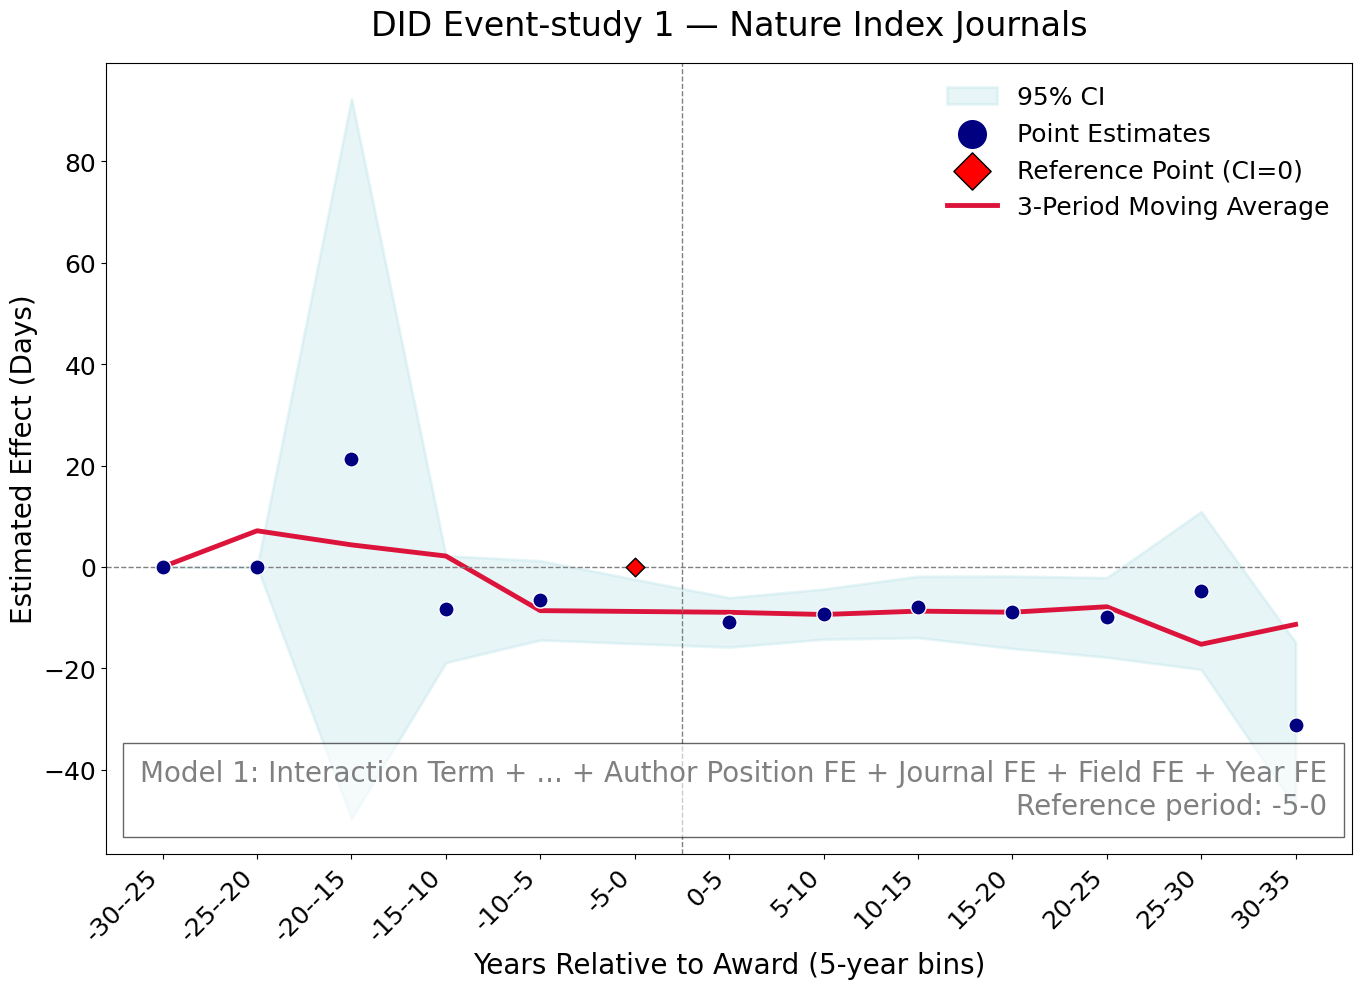

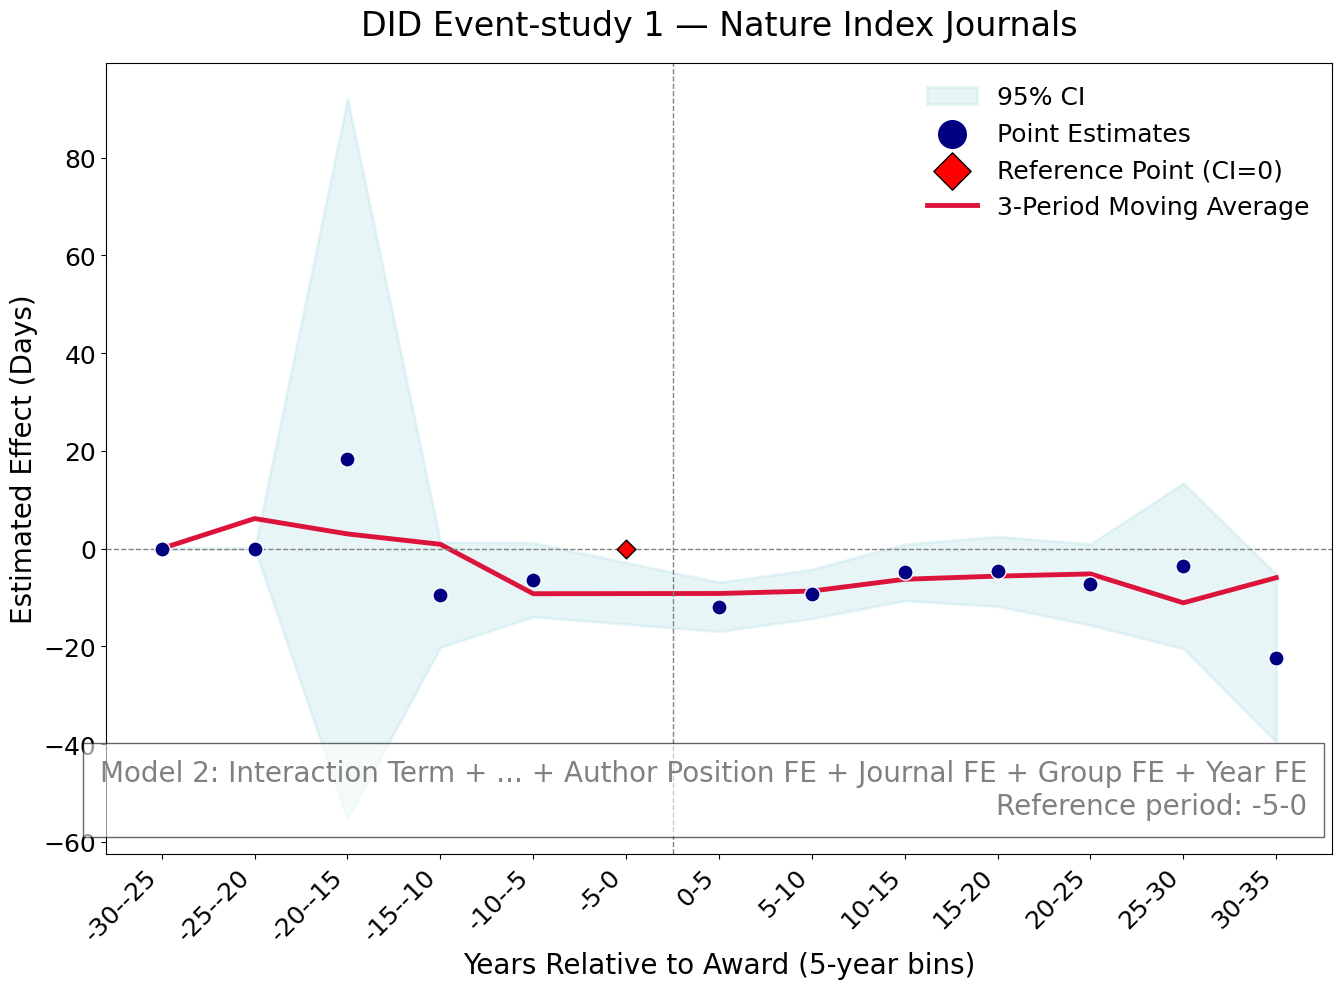


Processing Study 2A: Nature/Science/PNAS...


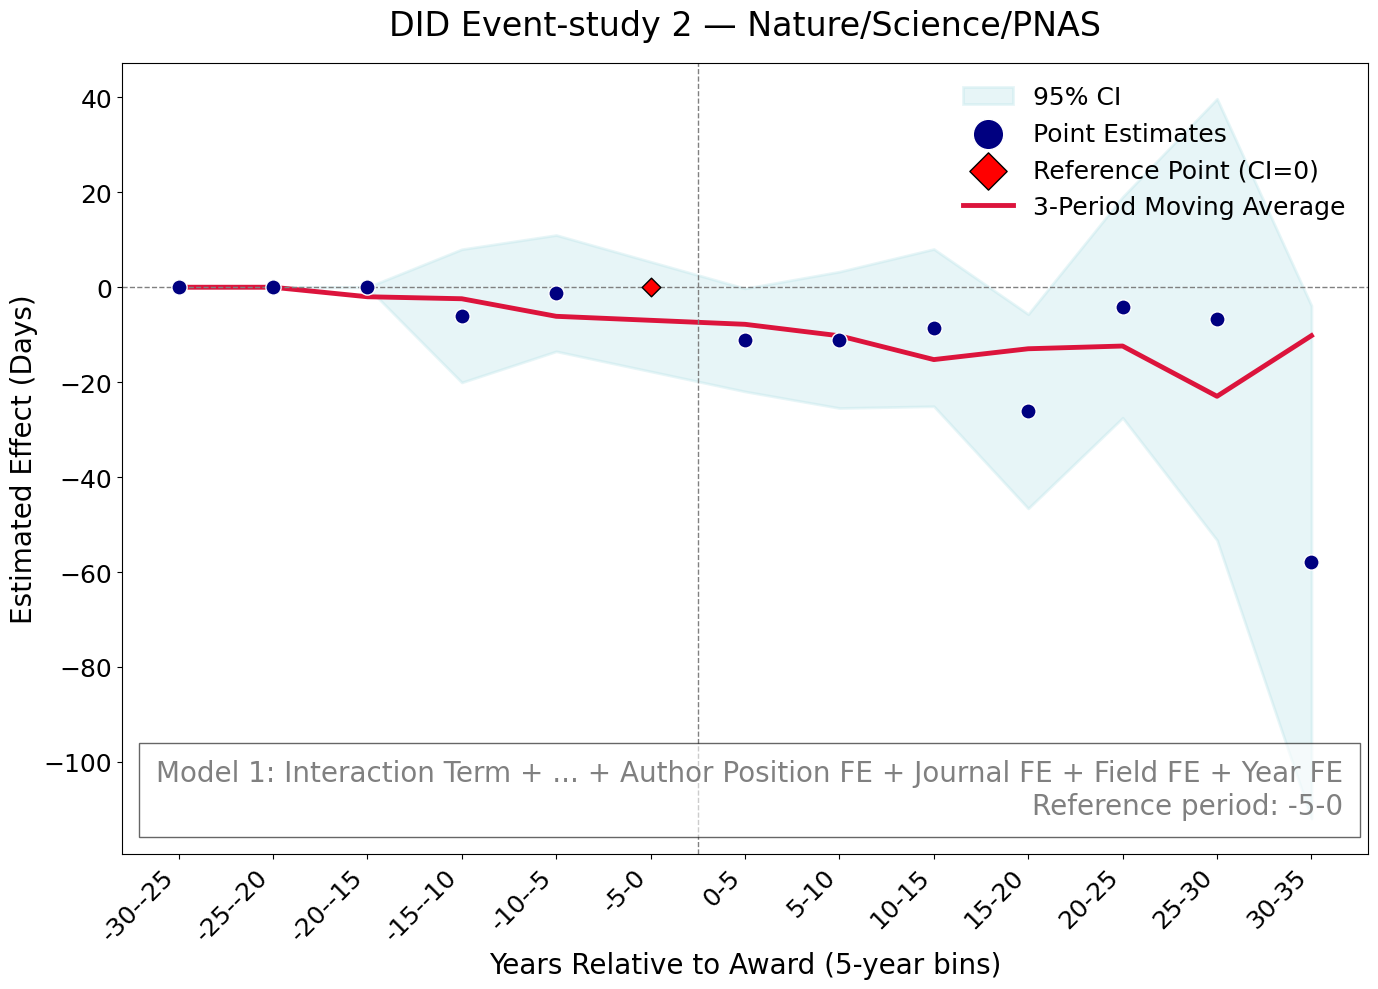

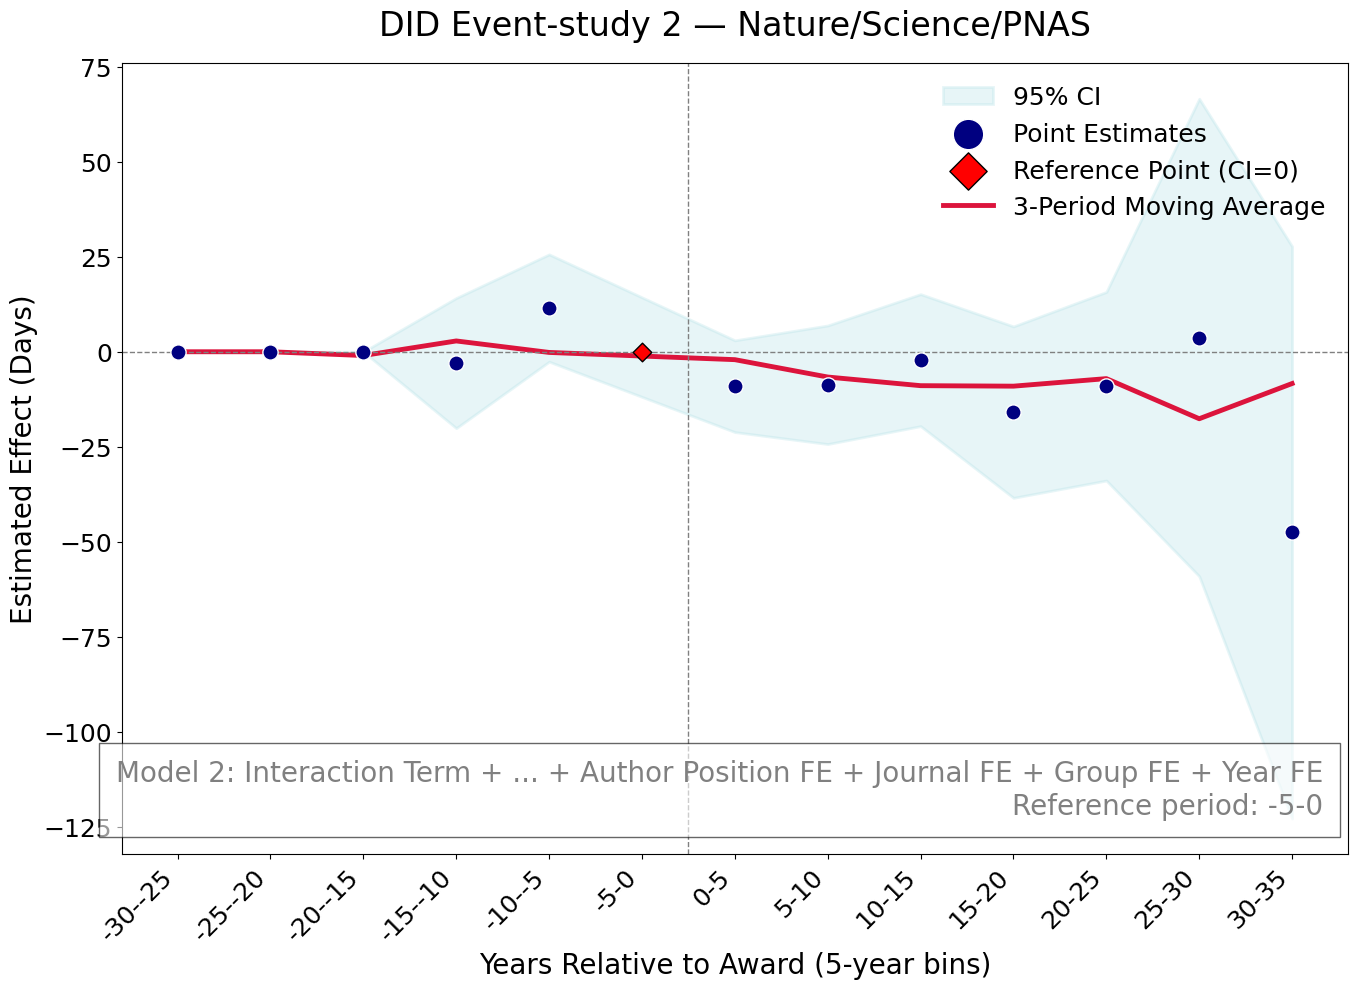


Processing Study 2B: Lancet/JAMA/NEJM/BMJ...


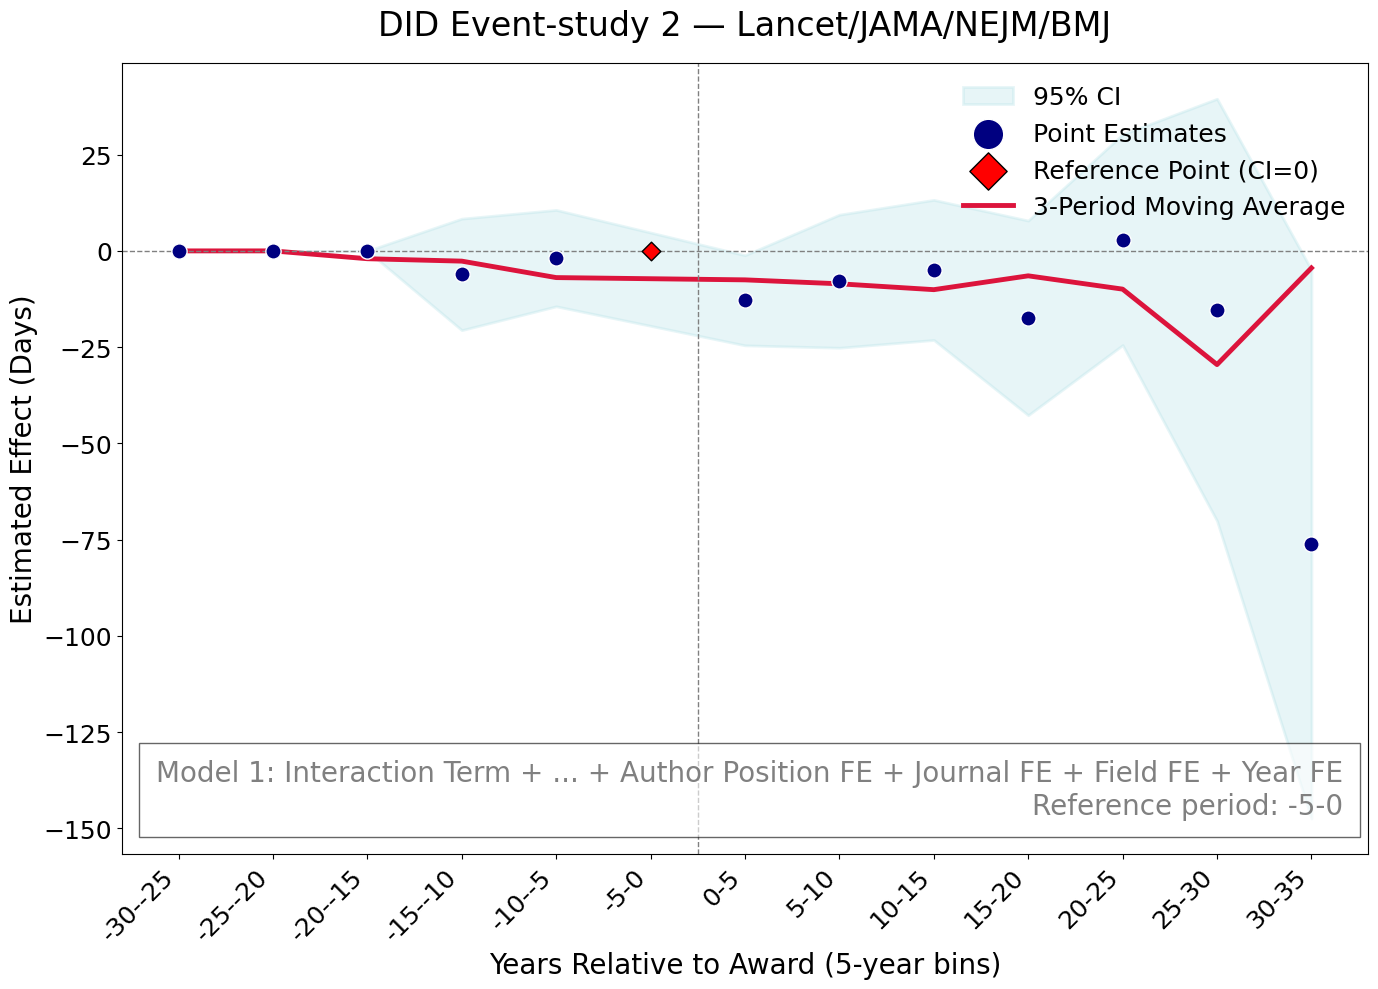

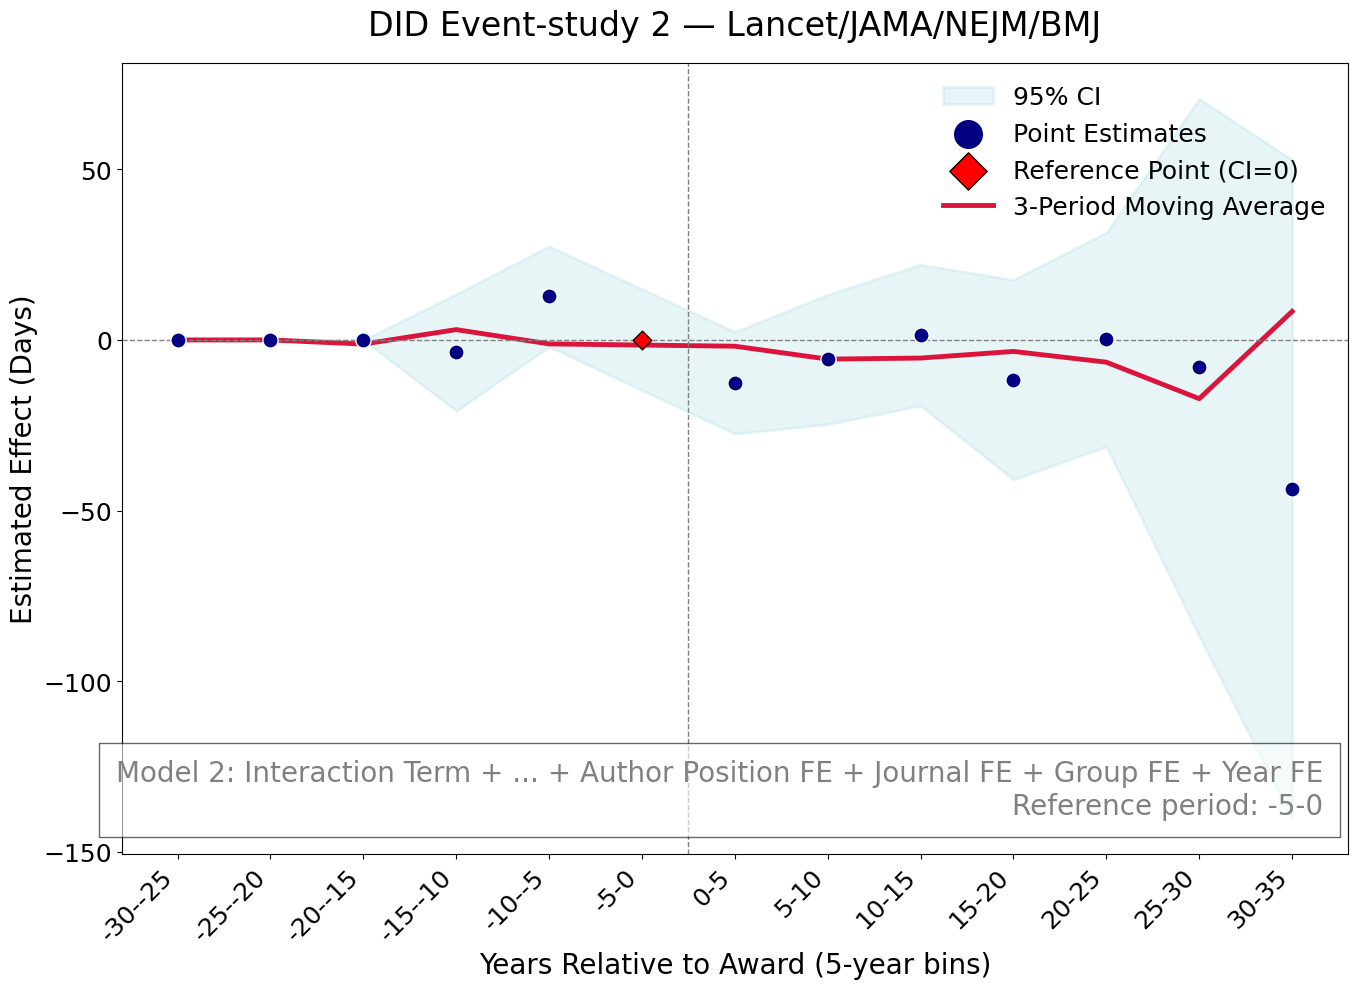


All plots generated successfully!


In [1]:
import pandas as pd
import sys
sys.path.append('/home/ls2543/python_packages')
import numpy as np
import re
import patsy
import statsmodels.api as sm
from joblib import load
import matplotlib.pyplot as plt

# —— 全局字体 & 样式设置 —— 
plt.rcParams.update({
    'axes.titlesize': 24,        # 放大标题
    'axes.labelsize': 20,        # 放大轴标签
    'xtick.labelsize': 18,       # 放大x轴刻度
    'ytick.labelsize': 18,       # 放大y轴刻度
    'legend.fontsize': 18,       # 放大图例文字
    'legend.title_fontsize': 18, # 放大图例标题
    'figure.figsize': (14, 10)   # 增大图像尺寸
})

# —— 读取原始数据 —— 
df = pd.read_csv(
    'final_group_pos_doipmid_puby_deltadays_field_tsize_top5_before0_after1_coauthor_wc0_natindex_fpy_aca_exp_jif_EISSN.csv',
    low_memory=False
)
df['is_nature_index'] = df['is_nature_index'].fillna(2).astype('category')
df['JournalISSN']      = df['JournalISSN'].fillna("Unknown")
df['author_position']  = pd.Categorical(df['author_position'], categories=["first","middle","last"])
df['field']            = df['field'].astype('category')
df['is_top5']          = df['is_top5'].astype('category')
df['before_or_after']  = df['before_or_after'].astype('category')
df['group_id']         = df['group_id'].astype(str).astype('category')

# —— 计算通用 5-year bins & labels —— 
def make_bins_and_labels(year_diff):
    mn = int(np.floor(year_diff.min()/5)*5)
    mx = int(np.ceil(year_diff.max()/5)*5)
    bins = list(range(mn, mx+5, 5))
    if 0 not in bins:
        bins.insert(np.searchsorted(bins, 0), 0)
    bins = sorted(bins)
    labels = []
    level_to_mid = {}
    reference_bin_label = None  # 初始化基准期标签

    for i in range(len(bins) - 1):
        left = bins[i]
        right = bins[i + 1]
    
        # 关键修改：判断当前区间是否包含 t = -1 (获奖前1年)
        if left <= -1 < right:
            lab = f"{left}-{right}" # 不再添加 (Reference) 后缀
            reference_bin_label = lab # 记录下这个标签，后面要用
        else:
            # 对于其他区间，正常命名
            lab = f"{left}-{right}"
        
        labels.append(lab)
        level_to_mid[lab] = (left + right) / 2
        
    return bins, labels, level_to_mid, reference_bin_label  # 返回基准期标签

# —— 提取 plot_df 函数 —— 
def extract_plot_df(model, level_to_mid, ref_label):
    terms = [t for t in model.params.index if 'C(if_winner)[T.1]:C(year_diff_type)' in t]
    data = []
    ci = model.conf_int(0.05)
    for t in terms:
        m = re.search(r'C\(year_diff_type\)\[([^]]+)\]', t)
        if not m: continue
        lbl = m.group(1)
        if lbl == ref_label: continue  # 跳过基准期，我们将手动添加
        
        # 获取中点值
        if lbl in level_to_mid:
            mid = level_to_mid[lbl]
        else:
            nums = re.findall(r'-?\d+', lbl)
            if len(nums) == 2:
                mid = (int(nums[0]) + int(nums[1])) / 2.0
            else:
                continue
        
        data.append({
            'term': t,
            'year_mid': mid,
            'label': lbl,
            'coef': model.params[t],
            'lower_ci': ci.loc[t, 0],
            'upper_ci': ci.loc[t, 1],
            'is_reference': False
        })
    
    # 添加基准期点
    if ref_label and ref_label in level_to_mid:
        ref_mid = level_to_mid[ref_label]
        data.append({
            'term': 'Reference',
            'year_mid': ref_mid,
            'label': ref_label,
            'coef': 0.0,
            'lower_ci': 0.0,
            'upper_ci': 0.0,
            'is_reference': True
        })
    
    dfp = pd.DataFrame(data).sort_values('year_mid')
    
    # 计算移动平均（排除基准期点）
    non_ref = dfp[~dfp['is_reference']].copy()
    if len(non_ref) > 0:
        non_ref['ma'] = non_ref['coef'].rolling(3, center=True, min_periods=1).mean()
    
    # 合并回基准期点
    ref_points = dfp[dfp['is_reference']].copy()
    ref_points['ma'] = np.nan  # 基准期点没有移动平均
    
    dfp = pd.concat([non_ref, ref_points]).sort_values('year_mid')
    return dfp

# —— 绘图模板 —— 
def plot_zoom(dfp, title, model_desc, ref_label, outname=None):
    fig, ax = plt.subplots(figsize=(14, 10))
    
    # 筛选指定区间
    zoom = dfp[(dfp.year_mid >= -27.5) & (dfp.year_mid <= 32.5)]
    
    # 分离基准期点和其他点
    ref_points = zoom[zoom['is_reference']]
    non_ref_points = zoom[~zoom['is_reference']]
    
    # 绘制非基准期点的置信区间
    ax.fill_between(non_ref_points.year_mid, non_ref_points.lower_ci, non_ref_points.upper_ci,
                    linewidth=2, alpha=0.3, color='#B0E0E6', label='95% CI')
    
    # 绘制非基准期点的点估计（放大点）
    ax.scatter(non_ref_points.year_mid, non_ref_points.coef, s=120, 
               color='navy', edgecolor='white', zorder=5, label='Point Estimates')
    
    # 绘制基准期点（特殊标记，缩小大小）
    if not ref_points.empty:
        ax.scatter(ref_points.year_mid, ref_points.coef, s=90,  # 缩小标记大小
                   color='red', marker='D', edgecolor='black', zorder=10, 
                   label='Reference Point (CI=0)')
    
    # 绘制MA线（加粗）
    if not non_ref_points.empty and 'ma' in non_ref_points.columns:
        ax.plot(non_ref_points.year_mid, non_ref_points.ma, lw=3.5, color='crimson', 
                label=f'3-Period Moving Average')
    
    # 参考线
    ax.axhline(0, color='gray', ls='--', lw=1)
    ax.axvline(0, color='gray', ls='--', lw=1)
    
    # 设置标题和坐标轴
    ax.set_title(title, fontsize=24, pad=20)
    ax.set_xlabel("Years Relative to Award (5-year bins)", fontsize=20)
    ax.set_ylabel("Estimated Effect (Days)", fontsize=20)
    
    # 设置x轴刻度和标签
    ax.set_xticks(zoom.year_mid)
    ax.set_xticklabels(zoom.label, rotation=45, ha='right', fontsize=18)
    
    # 放大图例标记
    ax.legend(frameon=False, loc='upper right', fontsize=18, markerscale=2)
    
    # 添加模型描述和基准期信息（去掉Reference后缀）
    display_ref_label = ref_label  # 已经不再包含"(Reference)"后缀
    full_desc = f"{model_desc}\nReference period: {display_ref_label}"
    ax.text(0.98, 0.12, full_desc,
            transform=ax.transAxes,
            ha='right', va='top',
            fontsize=20,  # 放大字体
            color='gray',
            bbox=dict(facecolor='white', alpha=0.6, pad=12))
    
    plt.tight_layout()
    if outname:
        plt.savefig(outname, dpi=800, bbox_inches='tight')
    plt.show()

# 定义公式（供所有研究使用）
formula1 = '''
DeltaDays ~ 
C(if_winner):C(year_diff_type) + 
C(before_or_after) + 
C(is_top5) + 
JIF + teamsize + academic_experience + 
ref_num + cited_by_count + 
C(author_position) + C(JournalISSN) + 
C(field) + C(PubYear)
'''

formula2 = '''
DeltaDays ~ 
C(if_winner):C(year_diff_type) + 
C(before_or_after) + 
C(is_top5) + 
JIF + teamsize + academic_experience + 
ref_num + cited_by_count + 
C(author_position) + C(JournalISSN) + 
C(group_id) + C(PubYear)
'''

# ====================
# STUDY 1: Nature Index Journals
# ====================
print("Processing Study 1: Nature Index Journals...")

# 创建bins和标签
df_nature = df[df['is_nature_index'] == 1].copy()
bins1, labels1, mid1, ref_label1 = make_bins_and_labels(df_nature['year_diff'])
df_nature['year_diff_type'] = pd.cut(df_nature['year_diff'], bins=bins1, labels=labels1, right=False)

# 移除基准期类别
if ref_label1 and ref_label1 in df_nature['year_diff_type'].cat.categories:
    df_nature['year_diff_type'] = df_nature['year_diff_type'].cat.remove_categories([ref_label1])

# 清理数据
df_clean1 = df_nature.dropna(subset=[
    'DeltaDays', 'if_winner', 'year_diff_type', 'group_id',
    'JIF', 'teamsize', 'academic_experience', 'ref_num', 'cited_by_count'
])

# 重新训练模型（而不是使用旧的预训练模型）
y1, X1 = patsy.dmatrices(formula1, df_clean1, return_type='dataframe')
model1 = sm.OLS(y1, X1).fit(cov_type='cluster', cov_kwds={'groups': df_clean1['group_id']})

y2, X2 = patsy.dmatrices(formula2, df_clean1, return_type='dataframe')
model2 = sm.OLS(y2, X2).fit(cov_type='cluster', cov_kwds={'groups': df_clean1['group_id']})

# 提取绘图数据并绘制
plot_df1 = extract_plot_df(model1, mid1, ref_label1)
plot_zoom(plot_df1, 
          "DID Event-study 1 — Nature Index Journals",
          "Model 1: Interaction Term + ... + Author Position FE + Journal FE + Field FE + Year FE",
          ref_label1,
          'DID_event_study1_model1_zoom.png')

plot_df2 = extract_plot_df(model2, mid1, ref_label1)
plot_zoom(plot_df2, 
          "DID Event-study 1 — Nature Index Journals",
          "Model 2: Interaction Term + ... + Author Position FE + Journal FE + Group FE + Year FE",
          ref_label1,
          'DID_event_study1_model2_zoom.png')

# ====================================
# STUDY 2A: Nature/Science/PNAS
# ====================================
print("\nProcessing Study 2A: Nature/Science/PNAS...")
issn_a = {'0028-0836', '1476-4687', '0036-8075', '1095-9203', '0027-8424', '1091-6490'}
dfa = df[df['JournalISSN'].isin(issn_a)].copy()

# 创建bins和标签
bins2a, labels2a, mid2a, ref_label2a = make_bins_and_labels(dfa['year_diff'])
dfa['year_diff_type'] = pd.cut(dfa['year_diff'], bins=bins2a, labels=labels2a, right=False)

# 移除基准期类别
if ref_label2a and ref_label2a in dfa['year_diff_type'].cat.categories:
    dfa['year_diff_type'] = dfa['year_diff_type'].cat.remove_categories([ref_label2a])

# 清理数据
df_clean2a = dfa.dropna(subset=[
    'DeltaDays', 'if_winner', 'year_diff_type', 'group_id',
    'JIF', 'teamsize', 'academic_experience', 'ref_num', 'cited_by_count'
])

# MODEL 1
y1, X1 = patsy.dmatrices(formula1, df_clean2a, return_type='dataframe')
model2a1 = sm.OLS(y1, X1).fit(cov_type='cluster', cov_kwds={'groups': df_clean2a['group_id']})
plot_df2a1 = extract_plot_df(model2a1, mid2a, ref_label2a)
plot_zoom(plot_df2a1, 
          "DID Event-study 2 — Nature/Science/PNAS",
          "Model 1: Interaction Term + ... + Author Position FE + Journal FE + Field FE + Year FE",
          ref_label2a,
          'DID_event_study2a_model1_zoom.png')

# MODEL 2
y2, X2 = patsy.dmatrices(formula2, df_clean2a, return_type='dataframe')
model2a2 = sm.OLS(y2, X2).fit(cov_type='cluster', cov_kwds={'groups': df_clean2a['group_id']})
plot_df2a2 = extract_plot_df(model2a2, mid2a, ref_label2a)
plot_zoom(plot_df2a2, 
          "DID Event-study 2 — Nature/Science/PNAS",
          "Model 2: Interaction Term + ... + Author Position FE + Journal FE + Group FE + Year FE",
          ref_label2a,
          'DID_event_study2a_model2_zoom.png')

# ====================================
# STUDY 2B: Lancet/JAMA/NEJM/BMJ
# ====================================
print("\nProcessing Study 2B: Lancet/JAMA/NEJM/BMJ...")
issn_b = {'0028-0836', '1476-4687', '0098-7484', '1538-3598', '0028-4793', '1533-4406', '0959-8138', '1756-1833'}
dfb = df[df['JournalISSN'].isin(issn_b)].copy()

# 创建bins和标签
bins2b, labels2b, mid2b, ref_label2b = make_bins_and_labels(dfb['year_diff'])
dfb['year_diff_type'] = pd.cut(dfb['year_diff'], bins=bins2b, labels=labels2b, right=False)

# 移除基准期类别
if ref_label2b and ref_label2b in dfb['year_diff_type'].cat.categories:
    dfb['year_diff_type'] = dfb['year_diff_type'].cat.remove_categories([ref_label2b])

# 清理数据
df_clean2b = dfb.dropna(subset=[
    'DeltaDays', 'if_winner', 'year_diff_type', 'group_id',
    'JIF', 'teamsize', 'academic_experience', 'ref_num', 'cited_by_count'
])

# MODEL 1
y1b, X1b = patsy.dmatrices(formula1, df_clean2b, return_type='dataframe')
model2b1 = sm.OLS(y1b, X1b).fit(cov_type='cluster', cov_kwds={'groups': df_clean2b['group_id']})
plot_df2b1 = extract_plot_df(model2b1, mid2b, ref_label2b)
plot_zoom(plot_df2b1, 
          "DID Event-study 2 — Lancet/JAMA/NEJM/BMJ",
          "Model 1: Interaction Term + ... + Author Position FE + Journal FE + Field FE + Year FE",
          ref_label2b,
          'DID_event_study2b_model1_zoom.png')

# MODEL 2
y2b, X2b = patsy.dmatrices(formula2, df_clean2b, return_type='dataframe')
model2b2 = sm.OLS(y2b, X2b).fit(cov_type='cluster', cov_kwds={'groups': df_clean2b['group_id']})
plot_df2b2 = extract_plot_df(model2b2, mid2b, ref_label2b)
plot_zoom(plot_df2b2, 
          "DID Event-study 2 — Lancet/JAMA/NEJM/BMJ",
          "Model 2: Interaction Term + ... + Author Position FE + Journal FE + Group FE + Year FE",
          ref_label2b,
          'DID_event_study2b_model2_zoom.png')

print("\nAll plots generated successfully!")